<center>
<div style="color:;
           display:fill;
           border-radius:2px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.6px">

<h2 style="padding: 30px;
              color:snow;"> Práctica 3
</h2>
</div>

In [104]:
pip install tslearn

Note: you may need to restart the kernel to use updated packages.


In [108]:
pip install fastdtw

  Using cached fastdtw-0.3.4-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [109]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.signal import find_peaks
from scipy.spatial.distance import euclidean

In [111]:
from fastdtw import fastdtw

<center>
<div style="color:;
           display:fill;
           border-radius:2px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.6px">

<h2 style="padding: 30px;
              color:snow;"> Directorio y archivos csv's
</h2>
</div>

In [25]:
import os
import pandas as pd

# Directorio donde se encuentran los archivos CSV
directorio = 'PRACT3/INERCIALORIGINAL'

# Columnas que se desean mantener
columns_to_keep = ['SensorId', 'TimeStamp (s)', 'FrameNumber', 'AccX (g)', 'AccY (g)', 'AccZ (g)', 
                   'GyroX (deg/s)', 'GyroY (deg/s)', 'GyroZ (deg/s)', 'MagX (uT)', 'MagY (uT)', 'MagZ (uT)', 'EulerX (deg)', 'EulerY (deg)',
                   'EulerZ (deg)', 'QuatW', 'QuatX', 'QuatY', 'QuatZ', 'LinAccX (g)', 'LinAccY (g)', 'LinAccZ (g)']

# Lista para almacenar los directorios procesados
dirs = []

for dirname, _, filenames in os.walk(directorio):
    if '.ipynb_checkpoints' in dirname:
        continue
    
    for filename in filenames:
        # Construye la ruta completa del archivo
        file_path = os.path.join(dirname, filename)
        dirs.append(file_path)  # Añade la ruta del archivo a la lista
        
        # Carga el archivo CSV
        df = pd.read_csv(file_path)
        df.columns = df.columns.str.strip()  # Elimina espacios en blanco de los nombres de las columnas
        
        # Filtra las columnas disponibles que se desean mantener
        columns_available = [col for col in columns_to_keep if col in df.columns]
        
        # Crea un nuevo DataFrame con solo las columnas deseadas
        df_filtered = df[columns_available]
        
        # Guarda el archivo CSV filtrado, sobrescribiendo el original
        df_filtered.to_csv(file_path, index=False)
        
        print(f'Archivo modificado: {file_path}')

# Imprime los directorios procesados
print(dirs)


Archivo modificado: PRACT3/INERCIALORIGINAL/Juan.csv
Archivo modificado: PRACT3/INERCIALORIGINAL/Jonathan.csv
Archivo modificado: PRACT3/INERCIALORIGINAL/Scarlett.csv
Archivo modificado: PRACT3/INERCIALORIGINAL/Rachel.csv
Archivo modificado: PRACT3/INERCIALORIGINAL/GoldStand.csv
Archivo modificado: PRACT3/INERCIALORIGINAL/Cristian.csv
Archivo modificado: PRACT3/INERCIALORIGINAL/Validacion.csv
Archivo modificado: PRACT3/INERCIALORIGINAL/Ariana.csv
Archivo modificado: PRACT3/INERCIALORIGINAL/Andres.csv
Archivo modificado: PRACT3/INERCIALORIGINAL/Arturo.csv
Archivo modificado: PRACT3/INERCIALORIGINAL/Leydy.csv
Archivo modificado: PRACT3/INERCIALORIGINAL/Andrea.csv
['PRACT3/INERCIALORIGINAL/Juan.csv', 'PRACT3/INERCIALORIGINAL/Jonathan.csv', 'PRACT3/INERCIALORIGINAL/Scarlett.csv', 'PRACT3/INERCIALORIGINAL/Rachel.csv', 'PRACT3/INERCIALORIGINAL/GoldStand.csv', 'PRACT3/INERCIALORIGINAL/Cristian.csv', 'PRACT3/INERCIALORIGINAL/Validacion.csv', 'PRACT3/INERCIALORIGINAL/Ariana.csv', 'PRACT3/INERCI

El siguiente codigo analisa los datos de múltiples archivos CSV, indicando de sensores y cuantos de ellos representados resultados del movimiento de los individuos analizados.

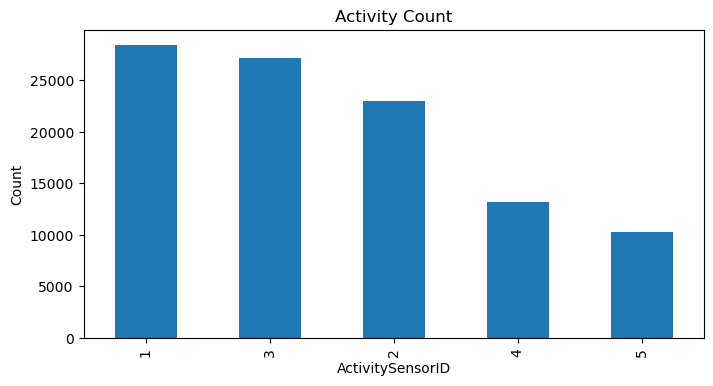

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Lista para almacenar los nombres de los archivos CSV
dirs = []

# Recorre todos los archivos en el directorio 'INERCIAL' y subdirectorios
for dirname, _, filenames in os.walk('PRACT3/INERCIALORIGINAL'):
    for filename in filenames:
        dirs.append(os.path.join(dirname, filename))

# Lista para almacenar los DataFrames de los archivos CSV
dfs = []

# Cargar los datos de los archivos CSV en DataFrames
for dir in dirs:
    df_temp = pd.read_csv(dir)
    # Agregar el DataFrame a la lista
    dfs.append(df_temp)

# Concatenar todos los DataFrames en uno solo
df = pd.concat(dfs)

# Contar las ocurrencias de cada tipo de actividad
ActivitySensorID_stats = df['SensorId'].value_counts()

# Visualizar las estadísticas en una gráfica de barras
ActivitySensorID_stats.plot(kind='bar', figsize=(8, 4))
plt.xlabel('ActivitySensorID')
plt.ylabel('Count')
plt.title('Activity Count')
plt.show()


In [34]:
# Contar las ocurrencias de cada SensorId
ActivitySensorID_stats = df['SensorId'].value_counts()
print(ActivitySensorID_stats)


SensorId
1    28435
3    27110
2    22992
4    13183
5    10236
Name: count, dtype: int64


Indicación de datos capturas en CSV's

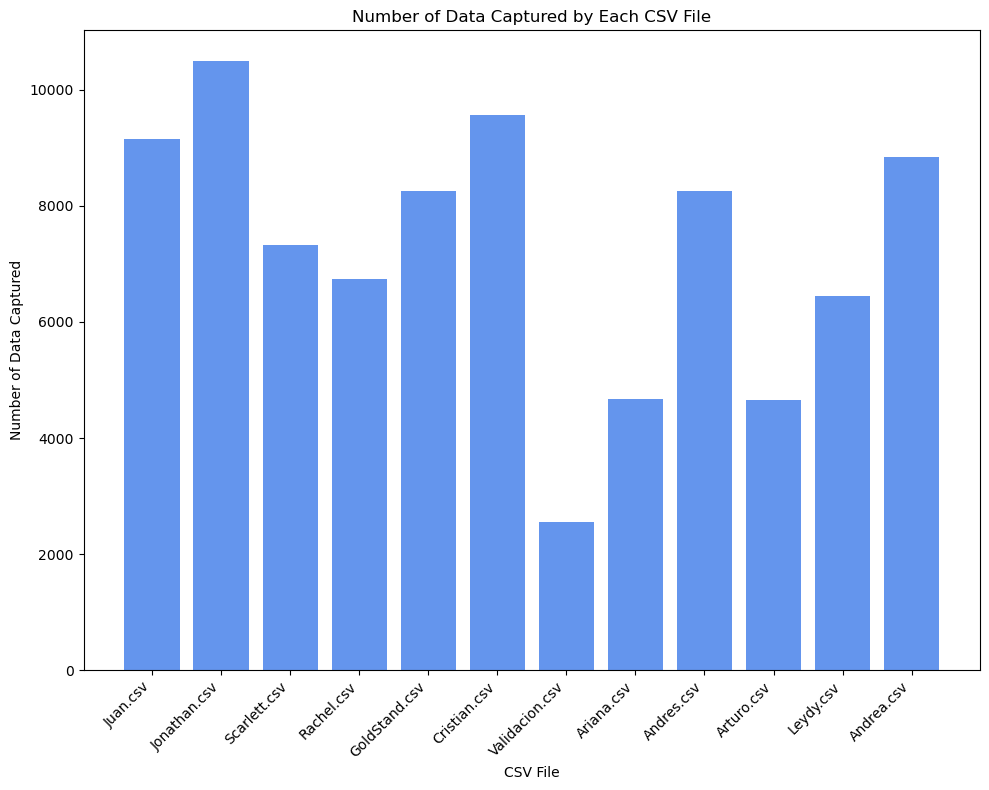

In [54]:
# Lista para almacenar los nombres de los archivos CSV
dirs = []

# Directorio donde se encuentran los archivos CSV
directorio = 'PRACT3/INERCIALORIGINAL'

# Recorre todos los archivos en el directorio 'INERCIAL' y subdirectorios, ignorando .ipynb_checkpoints
for dirname, _, filenames in os.walk(directorio):
    if '.ipynb_checkpoints' in dirname:
        # Ignora este directorio y continúa con el siguiente
        continue
    for filename in filenames:
        # Añade la ruta completa del archivo a la lista
        dirs.append(os.path.join(dirname, filename))

# Lista para almacenar el número de datos capturados por cada archivo CSV
data_counts = []

# Contar la cantidad de datos capturados por cada archivo CSV
for dir in dirs:
    df_temp = pd.read_csv(dir)
    data_counts.append(len(df_temp))

# Obtener los nombres de los archivos CSV (solo el nombre base, sin el directorio)
file_names = [os.path.basename(dir) for dir in dirs]

# Visualizar los datos en una gráfica de barras
plt.figure(figsize=(10, 8)) 
plt.bar(file_names, data_counts, color='cornflowerblue')
plt.xlabel('CSV File')
plt.ylabel('Number of Data Captured')
plt.title('Number of Data Captured by Each CSV File')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  

<center>
<div style="color:;
           display:fill;
           border-radius:2px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.6px">

<h2 style="padding: 30px;
              color:snow;"> Reducción de datos
</h2>
</div>

El código realiza una reducción de datos enfocándose en el análisis del Sensor Número 1, ubicado en la pierna izquierda, debido a que este sensor contiene más datos en comparación con los otros sensores. Para lograr esto, primero recopila una lista de archivos CSV en un directorio y subdirectorios específicos.

In [71]:
import pandas as pd
import os

# Directorio donde se encuentran los archivos CSV
directorio = 'PRACT3/INERCIAL'

# Lista para almacenar los nombres de los archivos CSV que se actualizarán
archivos_actualizados = []

# Iterar sobre los archivos en el directorio
for archivo in os.listdir(directorio):
    if archivo.endswith('.csv'):  # Verificar si el archivo es CSV
        # Ruta completa del archivo
        archivo_ruta = os.path.join(directorio, archivo)
        
        # Leer el archivo CSV
        df = pd.read_csv(archivo_ruta)
        
        # Filtrar los datos para mantener solo aquellos con SensorId igual a 3
        df_sensor_1 = df[df['SensorId'] == 1]
        
        # Guardar el DataFrame filtrado en el archivo CSV original
        df_sensor_1.to_csv(archivo_ruta, index=False)
        
        # Agregar el nombre del archivo a la lista de archivos actualizados
        archivos_actualizados.append(archivo)

# Imprimir los archivos que se han actualizado
print("Archivos CSV actualizados:")
for archivo in archivos_actualizados:
    print(archivo)


Archivos CSV actualizados:
Juan.csv
Jonathan.csv
Scarlett.csv
Rachel.csv
GoldStand.csv
Cristian.csv
Validacion.csv
Ariana.csv
Andres.csv
Arturo.csv
Leydy.csv
Andrea.csv


El código carga un DataFrame desde un archivo CSV específico ubicado en el directorio 'INERCIAL'. Luego, cuenta las ocurrencias de cada tipo de 'SensorId' en el DataFrame y crea gráficas de series temporales para los ángulos de Euler (Euler X, Euler Y y Euler Z) para cada 'SensorId'. Cada gráfica muestra la evolución de los ángulos de Euler en función del tiempo. Los ángulos se representan en diferentes colores (rojo para Euler X, verde para Euler Y y azul para Euler Z), con etiquetas y límites ajustados según los rangos de los datos. Este código se utilizó para todos los archivos CSV de los individuos, obteniendo así una representación visual de los datos de cada uno.

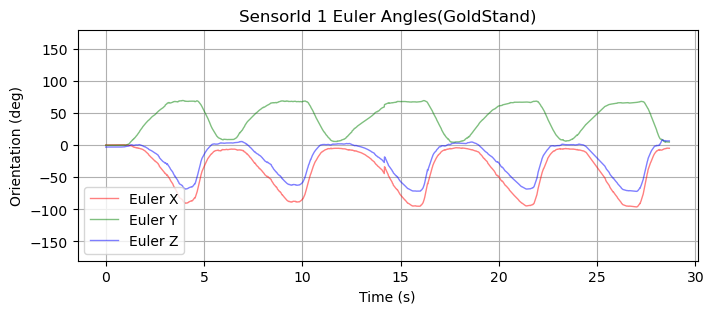

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el DataFrame desde un CSV específico ubicado en el directorio 'INERCIAL'
df = pd.read_csv('PRACT3/INERCIAL/GoldStand.csv')

# Contar las ocurrencias de cada tipo de SensorId
ActivitySensorID_stats = df['SensorId'].value_counts()

# Plotting time-series para Euler angles por SensorId
for sensor_id in ActivitySensorID_stats.index:
    df_temp = df[df['SensorId'] == sensor_id]
    df_temp.reset_index(inplace=True, drop=True)
    
    fig, ax1 = plt.subplots(1, 1, figsize=(8, 3))
    
    # Asumiendo que tienes una columna de tiempo, ajusta el nombre según tu DataFrame
    time = df_temp['TimeStamp (s)'].values
    
    # Plot para EulerX, EulerY, EulerZ
    ax1.plot(time, df_temp['EulerX (deg)'].values, color='red', alpha=0.5, label='Euler X', linewidth=1)
    ax1.plot(time, df_temp['EulerY (deg)'].values, color='green', alpha=0.5, label='Euler Y', linewidth=1)
    ax1.plot(time, df_temp['EulerZ (deg)'].values, color='blue', alpha=0.5, label='Euler Z', linewidth=1)    
    
    ax1.set_ylim(-180, 180)  # Ajusta este límite según los rangos de tus datos
    ax1.set_title(f'SensorId {sensor_id} Euler Angles(GoldStand)')
    ax1.legend()
    ax1.grid()
    
    # Etiquetas para los ejes
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Orientation (deg)')
    
    plt.show()

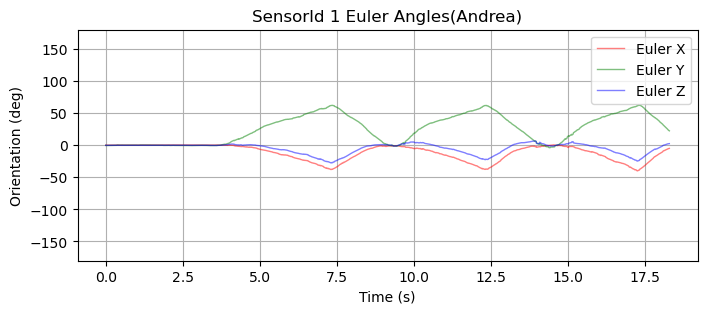

In [228]:
# Cargar el DataFrame desde un CSV específico ubicado en el directorio 'INERCIAL'
df = pd.read_csv('INERCIAL/Andrea.csv')

# Contar las ocurrencias de cada tipo de SensorId
ActivitySensorID_stats = df['SensorId'].value_counts()

# Plotting time-series para Euler angles por SensorId
for sensor_id in ActivitySensorID_stats.index:
    df_temp = df[df['SensorId'] == sensor_id]
    df_temp.reset_index(inplace=True, drop=True)
    
    fig, ax1 = plt.subplots(1, 1, figsize=(8, 3))
    
    # Asumiendo que tienes una columna de tiempo, ajusta el nombre según tu DataFrame
    time = df_temp['TimeStamp (s)'].values
    
    # Plot para EulerX, EulerY, EulerZ
    ax1.plot(time, df_temp['EulerX (deg)'].values, color='red', alpha=0.5, label='Euler X', linewidth=1)
    ax1.plot(time, df_temp['EulerY (deg)'].values, color='green', alpha=0.5, label='Euler Y', linewidth=1)
    ax1.plot(time, df_temp['EulerZ (deg)'].values, color='blue', alpha=0.5, label='Euler Z', linewidth=1)    
    
    ax1.set_ylim(-180, 180)  # Ajusta este límite según los rangos de tus datos
    ax1.set_title(f'SensorId {sensor_id} Euler Angles(Andrea)')
    ax1.legend()
    ax1.grid()
    
    # Etiquetas para los ejes
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Orientation (deg)')
    
    plt.show()

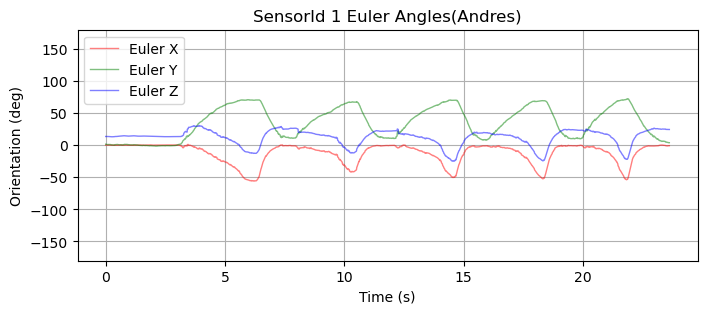

In [229]:
# Cargar el DataFrame desde un CSV específico ubicado en el directorio 'INERCIAL'
df = pd.read_csv('INERCIAL/Andres.csv')

# Contar las ocurrencias de cada tipo de SensorId
ActivitySensorID_stats = df['SensorId'].value_counts()

# Plotting time-series para Euler angles por SensorId
for sensor_id in ActivitySensorID_stats.index:
    df_temp = df[df['SensorId'] == sensor_id]
    df_temp.reset_index(inplace=True, drop=True)
    
    fig, ax1 = plt.subplots(1, 1, figsize=(8, 3))
    
    # Asumiendo que tienes una columna de tiempo, ajusta el nombre según tu DataFrame
    time = df_temp['TimeStamp (s)'].values
    
    # Plot para EulerX, EulerY, EulerZ
    ax1.plot(time, df_temp['EulerX (deg)'].values, color='red', alpha=0.5, label='Euler X', linewidth=1)
    ax1.plot(time, df_temp['EulerY (deg)'].values, color='green', alpha=0.5, label='Euler Y', linewidth=1)
    ax1.plot(time, df_temp['EulerZ (deg)'].values, color='blue', alpha=0.5, label='Euler Z', linewidth=1)    
    
    ax1.set_ylim(-180, 180)  # Ajusta este límite según los rangos de tus datos
    ax1.set_title(f'SensorId {sensor_id} Euler Angles(Andres)')
    ax1.legend()
    ax1.grid()
    
    # Etiquetas para los ejes
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Orientation (deg)')
    
    plt.show()

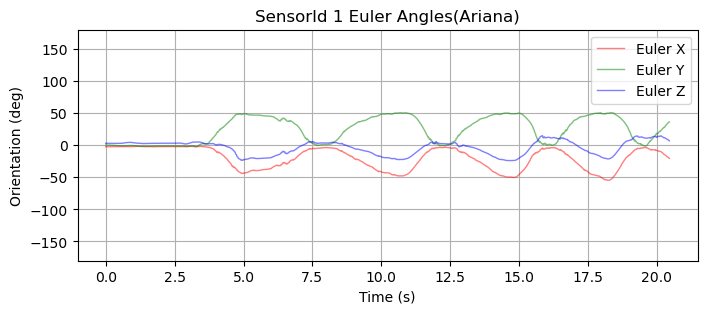

In [230]:
# Cargar el DataFrame desde un CSV específico ubicado en el directorio 'INERCIAL'
df = pd.read_csv('INERCIAL/Ariana.csv')

# Contar las ocurrencias de cada tipo de SensorId
ActivitySensorID_stats = df['SensorId'].value_counts()

# Plotting time-series para Euler angles por SensorId
for sensor_id in ActivitySensorID_stats.index:
    df_temp = df[df['SensorId'] == sensor_id]
    df_temp.reset_index(inplace=True, drop=True)
    
    fig, ax1 = plt.subplots(1, 1, figsize=(8, 3))
    
    # Asumiendo que tienes una columna de tiempo, ajusta el nombre según tu DataFrame
    time = df_temp['TimeStamp (s)'].values
    
    # Plot para EulerX, EulerY, EulerZ
    ax1.plot(time, df_temp['EulerX (deg)'].values, color='red', alpha=0.5, label='Euler X', linewidth=1)
    ax1.plot(time, df_temp['EulerY (deg)'].values, color='green', alpha=0.5, label='Euler Y', linewidth=1)
    ax1.plot(time, df_temp['EulerZ (deg)'].values, color='blue', alpha=0.5, label='Euler Z', linewidth=1)    
    
    ax1.set_ylim(-180, 180)  # Ajusta este límite según los rangos de tus datos
    ax1.set_title(f'SensorId {sensor_id} Euler Angles(Ariana)')
    ax1.legend()
    ax1.grid()
    
    # Etiquetas para los ejes
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Orientation (deg)')
    
    plt.show()

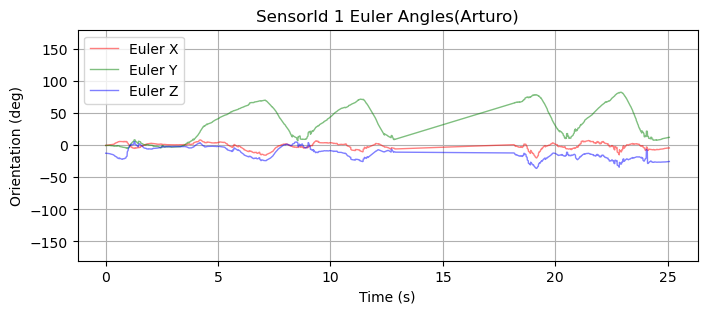

In [231]:
# Cargar el DataFrame desde un CSV específico ubicado en el directorio 'INERCIAL'
df = pd.read_csv('INERCIAL/Arturo.csv')

# Contar las ocurrencias de cada tipo de SensorId
ActivitySensorID_stats = df['SensorId'].value_counts()

# Plotting time-series para Euler angles por SensorId
for sensor_id in ActivitySensorID_stats.index:
    df_temp = df[df['SensorId'] == sensor_id]
    df_temp.reset_index(inplace=True, drop=True)
    
    fig, ax1 = plt.subplots(1, 1, figsize=(8, 3))
    
    # Asumiendo que tienes una columna de tiempo, ajusta el nombre según tu DataFrame
    time = df_temp['TimeStamp (s)'].values
    
    # Plot para EulerX, EulerY, EulerZ
    ax1.plot(time, df_temp['EulerX (deg)'].values, color='red', alpha=0.5, label='Euler X', linewidth=1)
    ax1.plot(time, df_temp['EulerY (deg)'].values, color='green', alpha=0.5, label='Euler Y', linewidth=1)
    ax1.plot(time, df_temp['EulerZ (deg)'].values, color='blue', alpha=0.5, label='Euler Z', linewidth=1)    
    
    ax1.set_ylim(-180, 180)  # Ajusta este límite según los rangos de tus datos
    ax1.set_title(f'SensorId {sensor_id} Euler Angles(Arturo)')
    ax1.legend()
    ax1.grid()
    
    # Etiquetas para los ejes
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Orientation (deg)')
    
    plt.show()

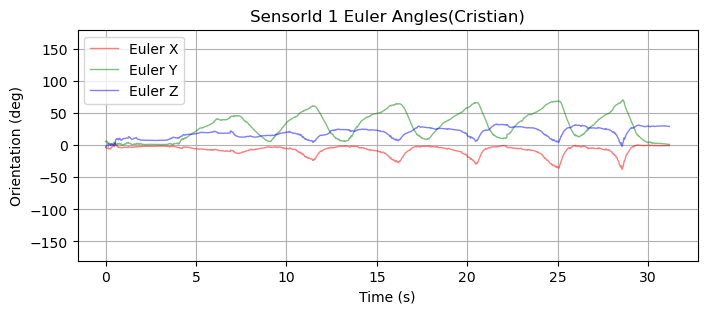

In [232]:
# Cargar el DataFrame desde un CSV específico ubicado en el directorio 'INERCIAL'
df = pd.read_csv('INERCIAL/Cristian.csv')

# Contar las ocurrencias de cada tipo de SensorId
ActivitySensorID_stats = df['SensorId'].value_counts()

# Plotting time-series para Euler angles por SensorId
for sensor_id in ActivitySensorID_stats.index:
    df_temp = df[df['SensorId'] == sensor_id]
    df_temp.reset_index(inplace=True, drop=True)
    
    fig, ax1 = plt.subplots(1, 1, figsize=(8, 3))
    
    # Asumiendo que tienes una columna de tiempo, ajusta el nombre según tu DataFrame
    time = df_temp['TimeStamp (s)'].values
    
    # Plot para EulerX, EulerY, EulerZ
    ax1.plot(time, df_temp['EulerX (deg)'].values, color='red', alpha=0.5, label='Euler X', linewidth=1)
    ax1.plot(time, df_temp['EulerY (deg)'].values, color='green', alpha=0.5, label='Euler Y', linewidth=1)
    ax1.plot(time, df_temp['EulerZ (deg)'].values, color='blue', alpha=0.5, label='Euler Z', linewidth=1)    
    
    ax1.set_ylim(-180, 180)  # Ajusta este límite según los rangos de tus datos
    ax1.set_title(f'SensorId {sensor_id} Euler Angles(Cristian)')
    ax1.legend()
    ax1.grid()
    
    # Etiquetas para los ejes
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Orientation (deg)')
    
    plt.show()

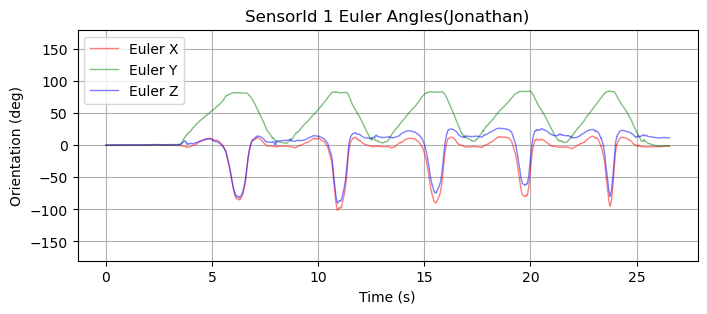

In [233]:
# Cargar el DataFrame desde un CSV específico ubicado en el directorio 'INERCIAL'
df = pd.read_csv('INERCIAL/Jonathan.csv')

# Contar las ocurrencias de cada tipo de SensorId
ActivitySensorID_stats = df['SensorId'].value_counts()

# Plotting time-series para Euler angles por SensorId
for sensor_id in ActivitySensorID_stats.index:
    df_temp = df[df['SensorId'] == sensor_id]
    df_temp.reset_index(inplace=True, drop=True)
    
    fig, ax1 = plt.subplots(1, 1, figsize=(8, 3))
    
    # Asumiendo que tienes una columna de tiempo, ajusta el nombre según tu DataFrame
    time = df_temp['TimeStamp (s)'].values
    
    # Plot para EulerX, EulerY, EulerZ
    ax1.plot(time, df_temp['EulerX (deg)'].values, color='red', alpha=0.5, label='Euler X', linewidth=1)
    ax1.plot(time, df_temp['EulerY (deg)'].values, color='green', alpha=0.5, label='Euler Y', linewidth=1)
    ax1.plot(time, df_temp['EulerZ (deg)'].values, color='blue', alpha=0.5, label='Euler Z', linewidth=1)    
    
    ax1.set_ylim(-180, 180)  # Ajusta este límite según los rangos de tus datos
    ax1.set_title(f'SensorId {sensor_id} Euler Angles(Jonathan)')
    ax1.legend()
    ax1.grid()
    
    # Etiquetas para los ejes
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Orientation (deg)')
    
    plt.show()

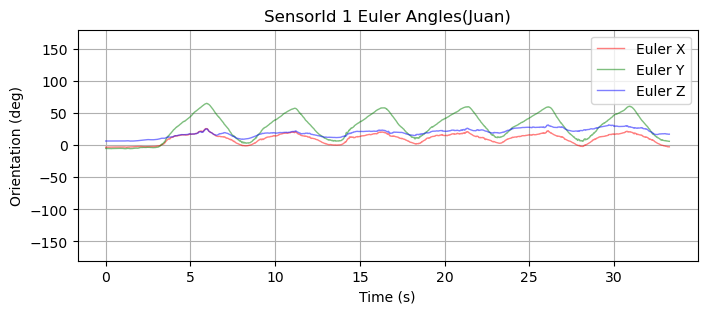

In [234]:
# Cargar el DataFrame desde un CSV específico ubicado en el directorio 'INERCIAL'
df = pd.read_csv('INERCIAL/Juan.csv')

# Contar las ocurrencias de cada tipo de SensorId
ActivitySensorID_stats = df['SensorId'].value_counts()

# Plotting time-series para Euler angles por SensorId
for sensor_id in ActivitySensorID_stats.index:
    df_temp = df[df['SensorId'] == sensor_id]
    df_temp.reset_index(inplace=True, drop=True)
    
    fig, ax1 = plt.subplots(1, 1, figsize=(8, 3))
    
    # Asumiendo que tienes una columna de tiempo, ajusta el nombre según tu DataFrame
    time = df_temp['TimeStamp (s)'].values
    
    # Plot para EulerX, EulerY, EulerZ
    ax1.plot(time, df_temp['EulerX (deg)'].values, color='red', alpha=0.5, label='Euler X', linewidth=1)
    ax1.plot(time, df_temp['EulerY (deg)'].values, color='green', alpha=0.5, label='Euler Y', linewidth=1)
    ax1.plot(time, df_temp['EulerZ (deg)'].values, color='blue', alpha=0.5, label='Euler Z', linewidth=1)    
    
    ax1.set_ylim(-180, 180)  # Ajusta este límite según los rangos de tus datos
    ax1.set_title(f'SensorId {sensor_id} Euler Angles(Juan)')
    ax1.legend()
    ax1.grid()
    
    # Etiquetas para los ejes
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Orientation (deg)')
    
    plt.show()

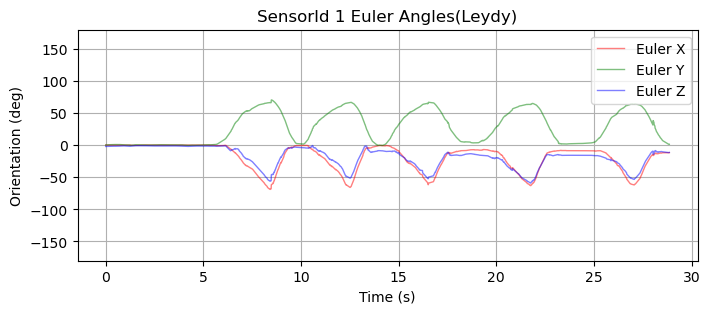

In [235]:
# Cargar el DataFrame desde un CSV específico ubicado en el directorio 'INERCIAL'
df = pd.read_csv('INERCIAL/Leydy.csv')

# Contar las ocurrencias de cada tipo de SensorId
ActivitySensorID_stats = df['SensorId'].value_counts()

# Plotting time-series para Euler angles por SensorId
for sensor_id in ActivitySensorID_stats.index:
    df_temp = df[df['SensorId'] == sensor_id]
    df_temp.reset_index(inplace=True, drop=True)
    
    fig, ax1 = plt.subplots(1, 1, figsize=(8, 3))
    
    # Asumiendo que tienes una columna de tiempo, ajusta el nombre según tu DataFrame
    time = df_temp['TimeStamp (s)'].values
    
    # Plot para EulerX, EulerY, EulerZ
    ax1.plot(time, df_temp['EulerX (deg)'].values, color='red', alpha=0.5, label='Euler X', linewidth=1)
    ax1.plot(time, df_temp['EulerY (deg)'].values, color='green', alpha=0.5, label='Euler Y', linewidth=1)
    ax1.plot(time, df_temp['EulerZ (deg)'].values, color='blue', alpha=0.5, label='Euler Z', linewidth=1)    
    
    ax1.set_ylim(-180, 180)  # Ajusta este límite según los rangos de tus datos
    ax1.set_title(f'SensorId {sensor_id} Euler Angles(Leydy)')
    ax1.legend()
    ax1.grid()
    
    # Etiquetas para los ejes
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Orientation (deg)')
    
    plt.show()

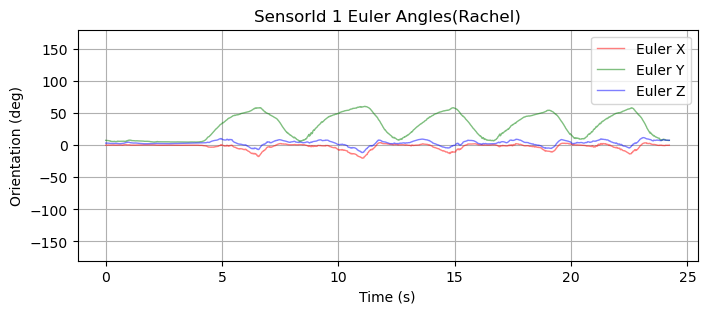

In [236]:
# Cargar el DataFrame desde un CSV específico ubicado en el directorio 'INERCIAL'
df = pd.read_csv('INERCIAL/Rachel.csv')

# Contar las ocurrencias de cada tipo de SensorId
ActivitySensorID_stats = df['SensorId'].value_counts()

# Plotting time-series para Euler angles por SensorId
for sensor_id in ActivitySensorID_stats.index:
    df_temp = df[df['SensorId'] == sensor_id]
    df_temp.reset_index(inplace=True, drop=True)
    
    fig, ax1 = plt.subplots(1, 1, figsize=(8, 3))
    
    # Asumiendo que tienes una columna de tiempo, ajusta el nombre según tu DataFrame
    time = df_temp['TimeStamp (s)'].values
    
    # Plot para EulerX, EulerY, EulerZ
    ax1.plot(time, df_temp['EulerX (deg)'].values, color='red', alpha=0.5, label='Euler X', linewidth=1)
    ax1.plot(time, df_temp['EulerY (deg)'].values, color='green', alpha=0.5, label='Euler Y', linewidth=1)
    ax1.plot(time, df_temp['EulerZ (deg)'].values, color='blue', alpha=0.5, label='Euler Z', linewidth=1)    
    
    ax1.set_ylim(-180, 180)  # Ajusta este límite según los rangos de tus datos
    ax1.set_title(f'SensorId {sensor_id} Euler Angles(Rachel)')
    ax1.legend()
    ax1.grid()
    
    # Etiquetas para los ejes
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Orientation (deg)')
    
    plt.show()

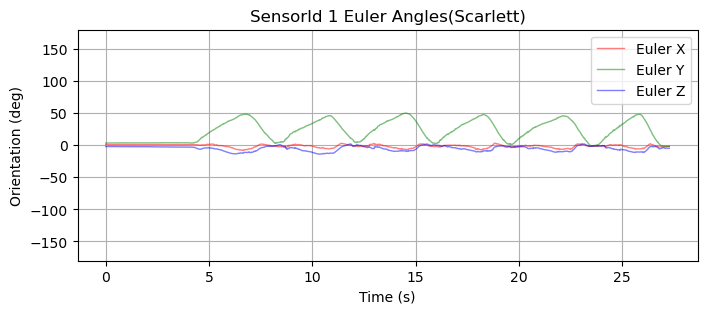

In [237]:
# Cargar el DataFrame desde un CSV específico ubicado en el directorio 'INERCIAL'
df = pd.read_csv('INERCIAL/Scarlett.csv')

# Contar las ocurrencias de cada tipo de SensorId
ActivitySensorID_stats = df['SensorId'].value_counts()

# Plotting time-series para Euler angles por SensorId
for sensor_id in ActivitySensorID_stats.index:
    df_temp = df[df['SensorId'] == sensor_id]
    df_temp.reset_index(inplace=True, drop=True)
    
    fig, ax1 = plt.subplots(1, 1, figsize=(8, 3))
    
    # Asumiendo que tienes una columna de tiempo, ajusta el nombre según tu DataFrame
    time = df_temp['TimeStamp (s)'].values
    
    # Plot para EulerX, EulerY, EulerZ
    ax1.plot(time, df_temp['EulerX (deg)'].values, color='red', alpha=0.5, label='Euler X', linewidth=1)
    ax1.plot(time, df_temp['EulerY (deg)'].values, color='green', alpha=0.5, label='Euler Y', linewidth=1)
    ax1.plot(time, df_temp['EulerZ (deg)'].values, color='blue', alpha=0.5, label='Euler Z', linewidth=1)    
    
    ax1.set_ylim(-180, 180)  # Ajusta este límite según los rangos de tus datos
    ax1.set_title(f'SensorId {sensor_id} Euler Angles(Scarlett)')
    ax1.legend()
    ax1.grid()
    
    # Etiquetas para los ejes
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Orientation (deg)')
    
    plt.show()

In [50]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('PRACT3/INERCIAL/validacion_sensor_1.csv')

# Eliminar la columna 'filename'
df.drop(columns=['filename'], inplace=True)

# Guardar el DataFrame modificado en un nuevo archivo CSV
df.to_csv('PRACT3/INERCIAL/Validacion.csv', index=False)

print("Archivo guardado sin la columna 'filename'.")


Archivo guardado sin la columna 'filename'.


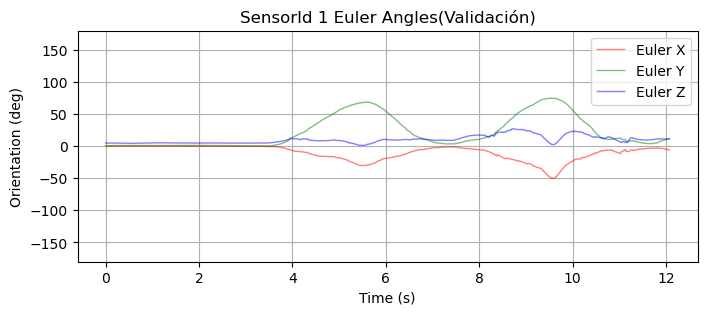

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el DataFrame desde un CSV específico ubicado en el directorio 'INERCIAL'
df = pd.read_csv('PRACT3/INERCIAL/Validacion.csv')

# Contar las ocurrencias de cada tipo de SensorId
ActivitySensorID_stats = df['SensorId'].value_counts()

# Plotting time-series para Euler angles por SensorId
for sensor_id in ActivitySensorID_stats.index:
    df_temp = df[df['SensorId'] == sensor_id]
    df_temp.reset_index(inplace=True, drop=True)
    
    fig, ax1 = plt.subplots(1, 1, figsize=(8, 3))
    
    # Asegúrate de ajustar los nombres de las columnas para incluir el espacio inicial
    time = df_temp[' TimeStamp (s)'].values
    
    # Plot para EulerX, EulerY, EulerZ, ajustando los nombres de las columnas
    ax1.plot(time, df_temp[' EulerX (deg)'].values, color='red', alpha=0.5, label='Euler X', linewidth=1)
    ax1.plot(time, df_temp[' EulerY (deg)'].values, color='green', alpha=0.5, label='Euler Y', linewidth=1)
    ax1.plot(time, df_temp[' EulerZ (deg)'].values, color='blue', alpha=0.5, label='Euler Z', linewidth=1)    
    
    ax1.set_ylim(-180, 180)
    ax1.set_title(f'SensorId {sensor_id} Euler Angles(Validación)')
    ax1.legend()
    ax1.grid()
    
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Orientation (deg)')
    
    plt.show()


<center>
<div style="color:;
           display:fill;
           border-radius:2px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.6px">

<h2 style="padding: 30px;
              color:snow;"> Segmentación
</h2>
</div>

Se puede visualizar la segmentación de los datos de ángulos de Euler para el SensorId 1, destacando los puntos de cambio significativos en la curvatura de la señal a lo largo del tiempo.

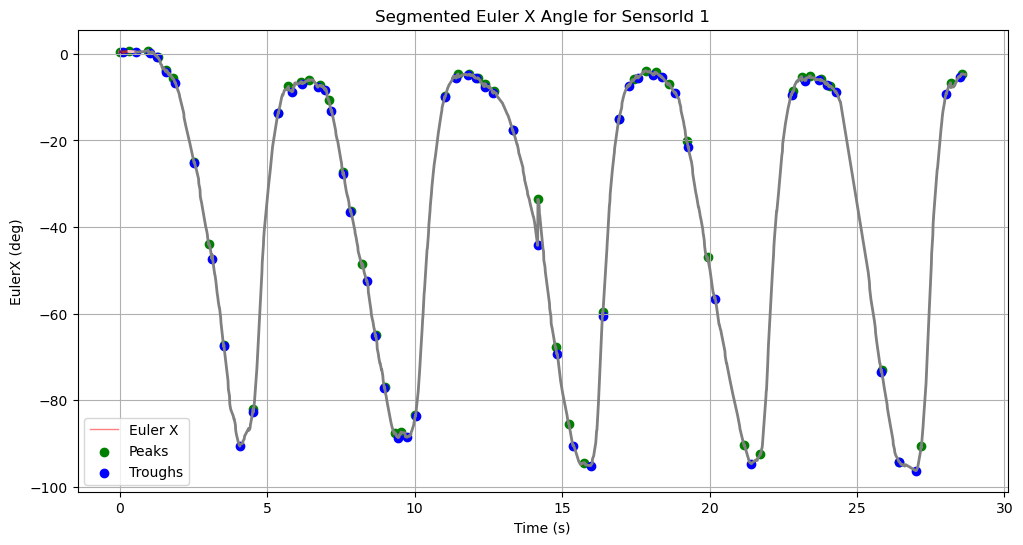

([2, 12, 27, 45, 68], array([0.0199, 0.1199, 0.3099, 0.5399, 0.9599]))

In [73]:
from scipy.signal import find_peaks

# Selecting the data for SensorId 1
sensor_data = df[df['SensorId'] == 1]

# We will use EulerX (deg) for segmentation
euler_x = sensor_data['EulerX (deg)'].values
time_stamps = sensor_data['TimeStamp (s)'].values

# Finding peaks (maxima) and troughs (minima) for segmentation
peaks, _ = find_peaks(euler_x, distance=20)  # distance is used to minimize noise effect
troughs, _ = find_peaks(-euler_x, distance=20)

# Combining the indices of peaks and troughs and sorting them
segment_points = sorted(list(peaks) + list(troughs))

# Considering we need to split into 5 segments, we might need to adjust the number of points
# We will select points which define the most significant changes in curvature
# This is a simplification and for a more accurate segmentation more sophisticated analysis may be required
segment_points = segment_points[:5] if len(segment_points) > 5 else segment_points

# Now let's plot the segmented curve with different colors for each segment
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(time_stamps, euler_x, label='Euler X', color='red', alpha=0.5, linewidth=1)

# Mark peaks and troughs
plt.scatter(time_stamps[peaks], euler_x[peaks], color='green', label='Peaks')
plt.scatter(time_stamps[troughs], euler_x[troughs], color='blue', label='Troughs')

# Plot each segment in different color
colors = ['orange', 'purple', 'brown', 'pink', 'grey']
start_point = 0
for i, point in enumerate(segment_points):
    plt.plot(time_stamps[start_point:point], euler_x[start_point:point], color=colors[i], linewidth=2)
    start_point = point

# Plotting the last segment
plt.plot(time_stamps[start_point:], euler_x[start_point:], color=colors[-1], linewidth=2)

plt.title('Segmented Euler X Angle for SensorId 1')
plt.xlabel('Time (s)')
plt.ylabel('EulerX (deg)')
plt.legend()
plt.grid(True)
plt.show()

# Returning the segment points for reference
segment_points, time_stamps[segment_points]

Se proporciona una visualización de la curva promedio de los segmentos normalizados de los ángulos de Euler en función del tiempo, lo que facilita la comparación y el análisis de las tendencias generales de los datos.

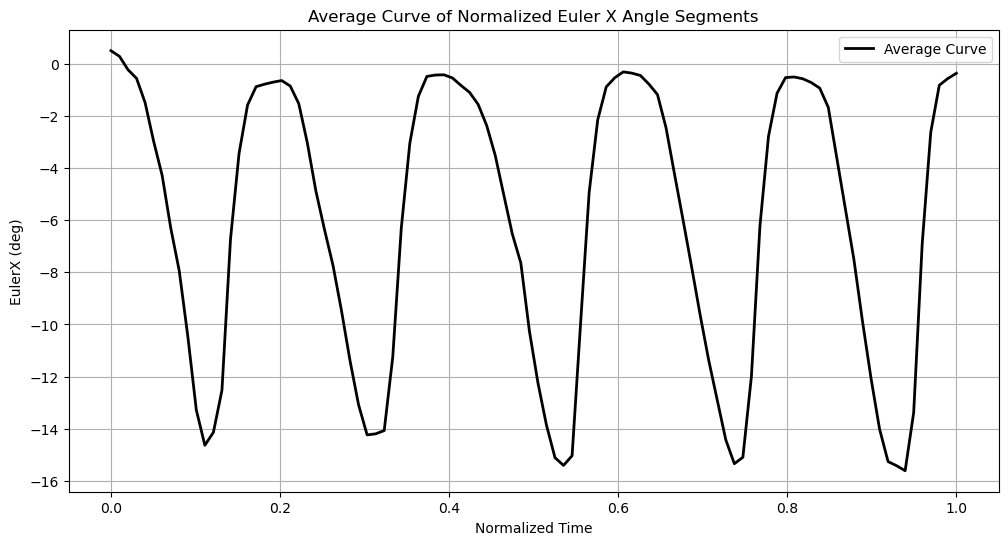

array([[ 0.        ,  0.50686293],
       [ 0.01010101,  0.29111719],
       [ 0.02020202, -0.22347026],
       [ 0.03030303, -0.55341063],
       [ 0.04040404, -1.48217314]])

In [188]:
from scipy.interpolate import interp1d
import numpy as np

# Function to normalize curves to the same length
def normalize_curve(time, signal, target_length=100):
    # Create a time series from 0 to 1 for the current curve
    normalized_time = np.linspace(time.min(), time.max(), num=target_length)
    # Interpolate the signal to the normalized time
    interpolate = interp1d(time, signal, kind='linear')
    normalized_signal = interpolate(normalized_time)
    return normalized_signal

# Number of points each segment curve should have after normalization
target_length = 100

# List to hold the normalized curves
normalized_curves = []

# Iterating over each segment and normalizing it
for i in range(len(segment_points)):
    if i == 0:
        # From the start of the signal to the first segment point
        segment_time = time_stamps[:segment_points[i]]
        segment_signal = euler_x[:segment_points[i]]
    else:
        # From the current segment point to the next
        segment_time = time_stamps[segment_points[i-1]:segment_points[i]]
        segment_signal = euler_x[segment_points[i-1]:segment_points[i]]
    
    # Normalize the current curve
    normalized_signal = normalize_curve(segment_time, segment_signal, target_length)
    normalized_curves.append(normalized_signal)

# Add the last segment if it was not included
if segment_points[-1] != len(euler_x):
    segment_time = time_stamps[segment_points[-1]:]
    segment_signal = euler_x[segment_points[-1]:]
    normalized_signal = normalize_curve(segment_time, segment_signal, target_length)
    normalized_curves.append(normalized_signal)

# Calculate the average curve
average_curve = np.mean(normalized_curves, axis=0)

# Plot the average curve
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0, 1, target_length), average_curve, color='black', label='Average Curve', linewidth=2)
plt.title('Average Curve of Normalized Euler X Angle Segments')
plt.xlabel('Normalized Time')
plt.ylabel('EulerX (deg)')
plt.legend()
plt.grid(True)
plt.show()

# Also return the average curve data for further comparison
average_curve_data = np.column_stack((np.linspace(0, 1, target_length), average_curve))
average_curve_data[:5]  # Show the first 5 data points of the average curve


El siguiente código proporciona una visualización detallada de cómo se alinean todas las curvas normalizadas de las sentadillas y cómo difieren de la curva promedio. Esto puede ser útil para comprender mejor las tendencias generales y las variaciones entre las diferentes instancias de la misma actividad.

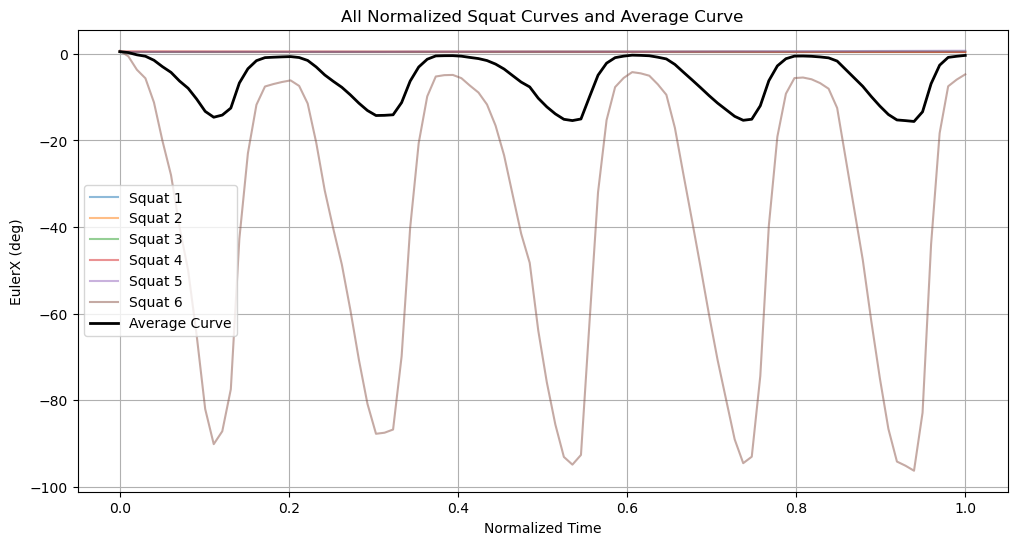

In [189]:
# Plot all normalized curves on top of each other to visualize the alignment
plt.figure(figsize=(12, 6))

# Plot each normalized curve
for i, curve in enumerate(normalized_curves):
    plt.plot(np.linspace(0, 1, target_length), curve, alpha=0.5, label=f'Squat {i+1}')

# Plot the average curve on top
plt.plot(np.linspace(0, 1, target_length), average_curve, color='black', linewidth=2, label='Average Curve')

plt.title('All Normalized Squat Curves and Average Curve')
plt.xlabel('Normalized Time')
plt.ylabel('EulerX (deg)')
plt.legend()
plt.grid(True)
plt.show()


<center>
<div style="color:;
           display:fill;
           border-radius:2px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.6px">

<h2 style="padding: 30px;
              color:snow;"> Comparacion de CSV con GoldStand (promedio, media y correlación cruzada)
</h2>
</div>

Este código realiza el procesamiento y promedio de las señales de ángulos de Euler de un DataFrame. Primero, encuentra los picos y valles en los datos de ángulo de Euler, luego normaliza las curvas a la misma longitud y finalmente calcula y grafica las curvas promedio para los ángulos de Euler X, Y y Z en función del tiempo normalizado.

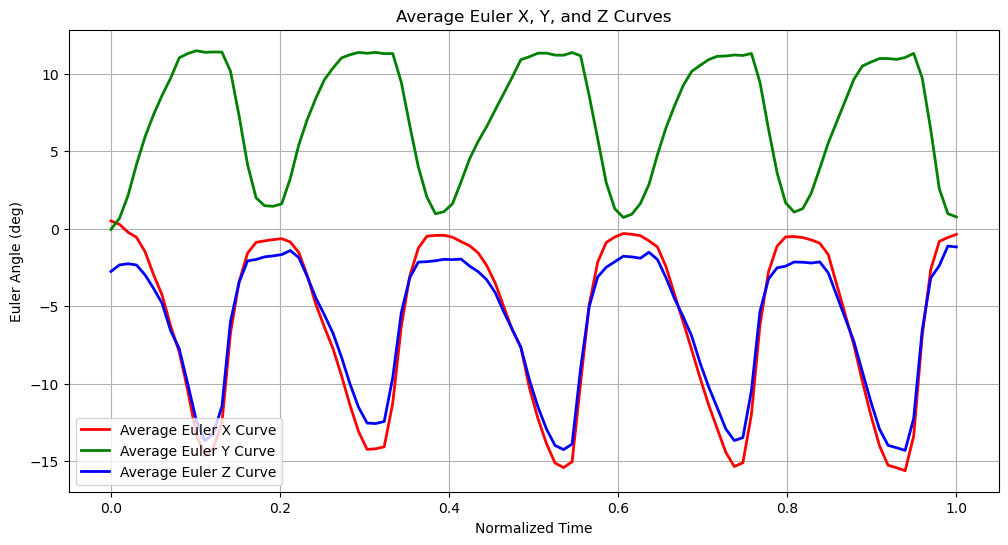

In [190]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Asumimos que 'df' es tu DataFrame y ya contiene las columnas 'TimeStamp (s)', 'EulerX (deg)', 'EulerY (deg)' y 'EulerZ (deg)'.
# Si no es así, debes cargar tu archivo CSV como se muestra a continuación:
# df = pd.read_csv('ruta_a_tu_archivo.csv')

# Encuentra los picos y los valles para los puntos de segmentación
euler_x = df['EulerX (deg)'].values
time_stamps = df['TimeStamp (s)'].values
peaks, _ = find_peaks(euler_x, distance=20)
troughs, _ = find_peaks(-euler_x, distance=20)
segment_points = sorted(list(peaks) + list(troughs))
segment_points = segment_points[:5] if len(segment_points) > 5 else segment_points

# Normaliza las curvas a la misma longitud
def normalize_curve(time, signal, target_length=100):
    normalized_time = np.linspace(time.min(), time.max(), num=target_length)
    interpolate = interp1d(time, signal, kind='linear')
    normalized_signal = interpolate(normalized_time)
    return normalized_signal

# Procesa y promedia las señales de ángulo de Euler
def process_and_average_euler_angle(euler_angle_column):
    normalized_curves_angle = []
    for i in range(len(segment_points)):
        if i == 0:
            segment_time = time_stamps[:segment_points[i]]
            segment_signal = euler_angle_column[:segment_points[i]]
        else:
            segment_time = time_stamps[segment_points[i-1]:segment_points[i]]
            segment_signal = euler_angle_column[segment_points[i-1]:segment_points[i]]
        normalized_signal = normalize_curve(segment_time, segment_signal, target_length)
        normalized_curves_angle.append(normalized_signal)
    if segment_points[-1] != len(euler_angle_column):
        segment_time = time_stamps[segment_points[-1]:]
        segment_signal = euler_angle_column[segment_points[-1]:]
        normalized_signal = normalize_curve(segment_time, segment_signal, target_length)
        normalized_curves_angle.append(normalized_signal)
    return np.mean(normalized_curves_angle, axis=0)

# Define el número de puntos que tendrá cada curva segmentada después de normalizar
target_length = 100

# Calcula las curvas promedio para Euler X, Y y Z
euler_y = df['EulerY (deg)'].values
euler_z = df['EulerZ (deg)'].values

average_curve = process_and_average_euler_angle(euler_x)
average_curve_y = process_and_average_euler_angle(euler_y)
average_curve_z = process_and_average_euler_angle(euler_z)

# Grafica las curvas promedio
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0, 1, target_length), average_curve, color='red', linewidth=2, label='Average Euler X Curve')
plt.plot(np.linspace(0, 1, target_length), average_curve_y, color='green', linewidth=2, label='Average Euler Y Curve')
plt.plot(np.linspace(0, 1, target_length), average_curve_z, color='blue', linewidth=2, label='Average Euler Z Curve')

plt.title('Average Euler X, Y, and Z Curves')
plt.xlabel('Normalized Time')
plt.ylabel('Euler Angle (deg)')
plt.legend()
plt.grid(True)
plt.show()



Este código carga un DataFrame desde un archivo CSV específico, luego encuentra los puntos de segmentación en los datos de ángulos de Euler para el conjunto de datos. Después, normaliza y promedia los ángulos de Euler para los datos. Finalmente, grafica las curvas promedio de los ángulos de Euler de GoldStand y individuos para su comparación visual.(APLICADOS PARA TODOS)

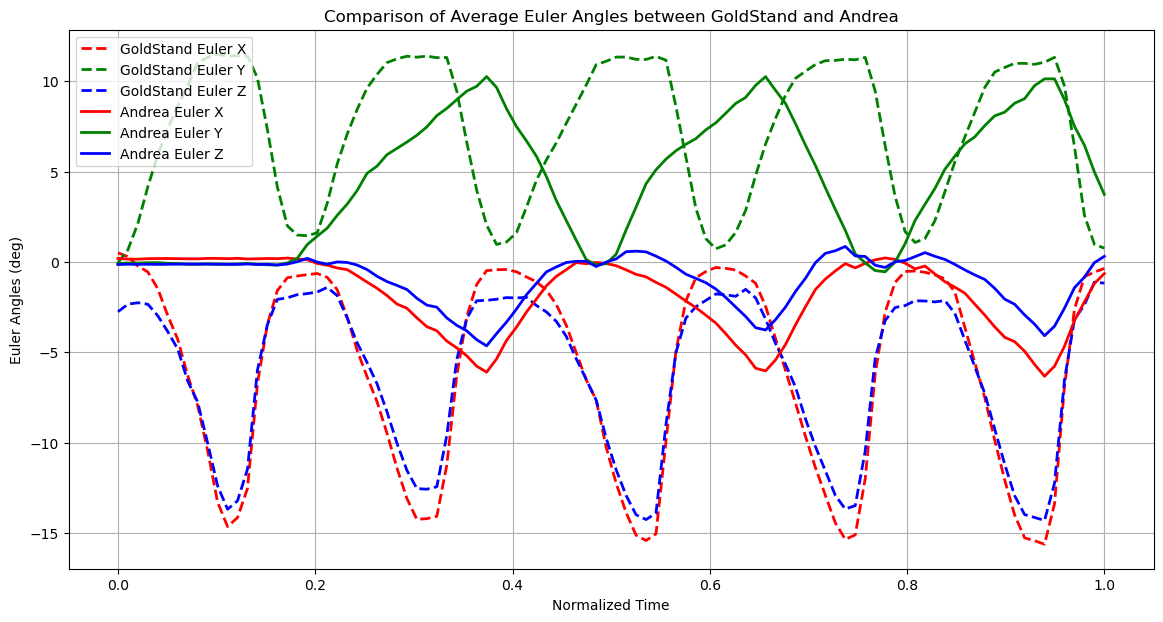

In [191]:
# Load the DataFrame from a specific CSV file located in the 'INERCIAL' directory
andrea_df = pd.read_csv('PRACT3/INERCIAL/Andrea.csv')

# Define a function to find the segmentation points for the Andrea data
def find_segmentation_points(signal):
    peaks, _ = find_peaks(signal, distance=20)
    troughs, _ = find_peaks(-signal, distance=20)
    return sorted(list(peaks) + list(troughs))

# Find segmentation points for Andrea data
segment_points_andrea_x = find_segmentation_points(andrea_df['EulerX (deg)'].values)
segment_points_andrea_y = find_segmentation_points(andrea_df['EulerY (deg)'].values)
segment_points_andrea_z = find_segmentation_points(andrea_df['EulerZ (deg)'].values)

# Since we are looking for 5 curvatures, we select the first 5 segmentation points
segment_points_andrea_x = segment_points_andrea_x[:5]
segment_points_andrea_y = segment_points_andrea_y[:5]
segment_points_andrea_z = segment_points_andrea_z[:5]

# Normalize and average the Euler angles for the Andrea data
def normalize_and_average(df, segment_points):
    euler_angles = ['EulerX (deg)', 'EulerY (deg)', 'EulerZ (deg)']
    average_curves = []
    for angle in euler_angles:
        signal = df[angle].values
        normalized_curves_angle = []
        for i in range(len(segment_points)):
            if i == 0:
                segment_signal = signal[:segment_points[i]]
            else:
                segment_signal = signal[segment_points[i-1]:segment_points[i]]
            time_segment = np.linspace(0, 1, len(segment_signal))
            normalized_signal = normalize_curve(time_segment, segment_signal, target_length)
            normalized_curves_angle.append(normalized_signal)
        if segment_points[-1] != len(signal):
            segment_signal = signal[segment_points[-1]:]
            time_segment = np.linspace(0, 1, len(segment_signal))
            normalized_signal = normalize_curve(time_segment, segment_signal, target_length)
            normalized_curves_angle.append(normalized_signal)
        average_curve = np.mean(normalized_curves_angle, axis=0)
        average_curves.append(average_curve)
    return average_curves

# Calculate the average curves for Andrea data
average_curves_andrea = normalize_and_average(andrea_df, segment_points_andrea_x)

# Now let's plot the average curves for GoldStand and Andrea together for visual comparison
plt.figure(figsize=(14, 7))

# GoldStand curves
plt.plot(np.linspace(0, 1, target_length), average_curve, 'r--', label='GoldStand Euler X', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curve_y, 'g--', label='GoldStand Euler Y', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curve_z, 'b--', label='GoldStand Euler Z', linewidth=2)

# Andrea curves
plt.plot(np.linspace(0, 1, target_length), average_curves_andrea[0], 'r-', label='Andrea Euler X', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curves_andrea[1], 'g-', label='Andrea Euler Y', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curves_andrea[2], 'b-', label='Andrea Euler Z', linewidth=2)

plt.title('Comparison of Average Euler Angles between GoldStand and Andrea')
plt.xlabel('Normalized Time')
plt.ylabel('Euler Angles (deg)')
plt.legend()
plt.grid(True)
plt.show()

Los datos de Andrea, en comparación con GoldStand, muestran movimientos menos amplios en los ejes X y Y, con una tendencia a ser más suaves y consistentes. En el eje Z, los movimientos de Andrea tienden a ser menos variados y más centrados en una orientación neutral en comparación con GoldStand.

In [192]:
# Definir una función para calcular la media y la desviación estándar para las curvas de Euler
def calculate_statistics(average_curves):
    statistics = {}
    for i, axis in enumerate(['X', 'Y', 'Z']):
        statistics[f'Euler{axis} Mean'] = np.mean(average_curves[i])
        statistics[f'Euler{axis} Std'] = np.std(average_curves[i])
    return statistics

# Calcular estadísticas para GoldStand
statistics_goldstand = calculate_statistics([average_curve, average_curve_y, average_curve_z])

# Calcular estadísticas para Leydy
statistics_andrea = calculate_statistics(average_curves_andrea)

statistics_goldstand, statistics_andrea

({'EulerX Mean': -6.0900611337019885,
  'EulerX Std': 5.416844488968032,
  'EulerY Mean': 7.176203195480959,
  'EulerY Std': 3.921573890138153,
  'EulerZ Mean': -6.2106382745132525,
  'EulerZ Std': 4.3654443467804},
 {'EulerX Mean': -1.8461653652968015,
  'EulerX Std': 2.0364388346933864,
  'EulerY Mean': 4.459213353277441,
  'EulerY Std': 3.618186539087802,
  'EulerZ Mean': -0.9621463624013471,
  'EulerZ Std': 1.3852385140103483})

Este código calcula la correlación cruzada normalizada entre las curvas de ángulos de Euler promedio de dos conjuntos de datos: uno llamado "GoldStand" y otro "Andrea". Utiliza la función `cross_correlation` para calcular la correlación cruzada para cada eje (X, Y, Z) de los ángulos de Euler. Posteriormente, grafica los resultados de la correlación cruzada para cada eje, mostrando cómo se relacionan las dos señales en función del retraso (lag). El objetivo es analizar la similitud y el desfase entre las curvas de ángulos de Euler de ambos conjuntos de datos en cada eje. Se observa que al menos dos señales de estas correlaciones están cercanas a 1, lo cual indica una mayor similitud entre las señales.

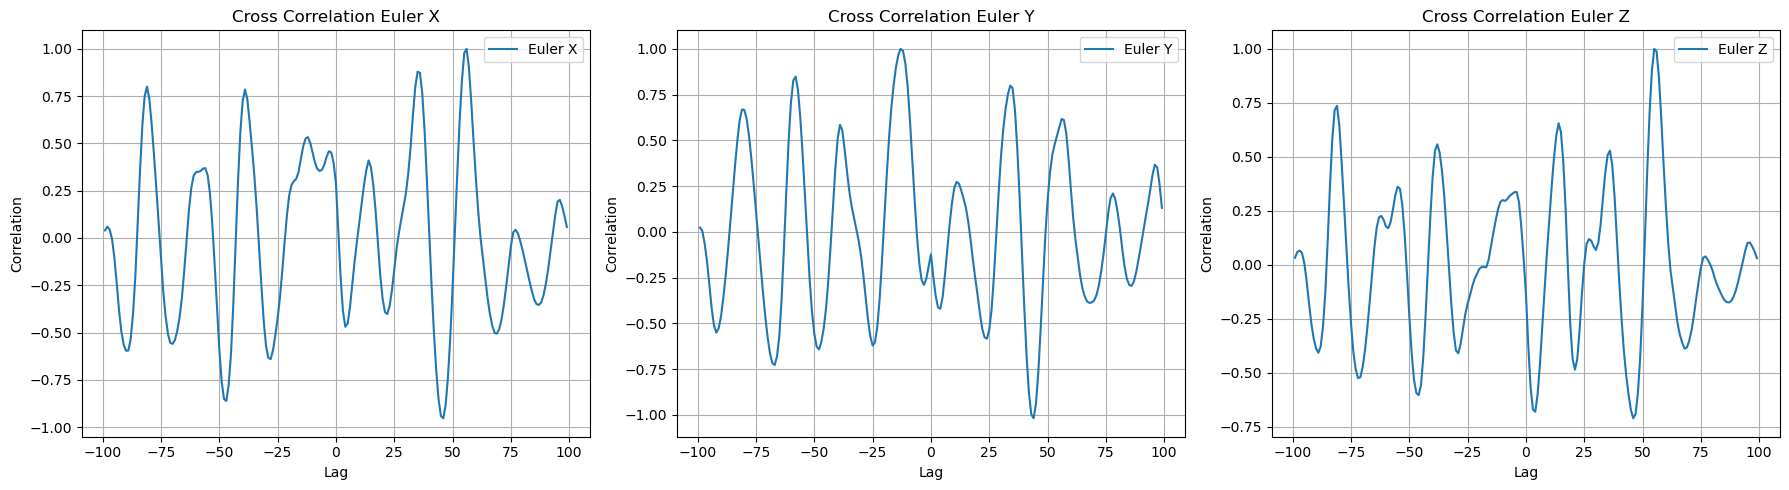

In [195]:
from scipy.signal import correlate

# Definir una función para calcular la correlación cruzada normalizada entre dos señales
def cross_correlation(signal_a, signal_b):
    correlation = correlate(signal_a - np.mean(signal_a), signal_b - np.mean(signal_b), mode='full')
    # Normalizar la correlación
    correlation /= np.max(correlation)
    # Calculamos los lags
    lags = np.arange(-len(signal_a) + 1, len(signal_b))
    return lags, correlation

# Calcular la correlación cruzada para Euler X, Y, Z
correlation_results = {}
for i, (curve_goldstand, curve_andrea) in enumerate(zip([average_curve, average_curve_y, average_curve_z], average_curves_andrea)):
    axis = ['X', 'Y', 'Z'][i]
    lags, correlation = cross_correlation(curve_goldstand, curve_andrea)
    correlation_results[axis] = {'lags': lags, 'correlation': correlation}

# Graficar los resultados de la correlación cruzada
plt.figure(figsize=(18, 5))

for i, axis in enumerate(['X', 'Y', 'Z']):
    plt.subplot(1, 3, i+1)
    plt.plot(correlation_results[axis]['lags'], correlation_results[axis]['correlation'], label=f'Euler {axis}')
    plt.title(f'Cross Correlation Euler {axis}')
    plt.xlabel('Lag')
    plt.ylabel('Correlation')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


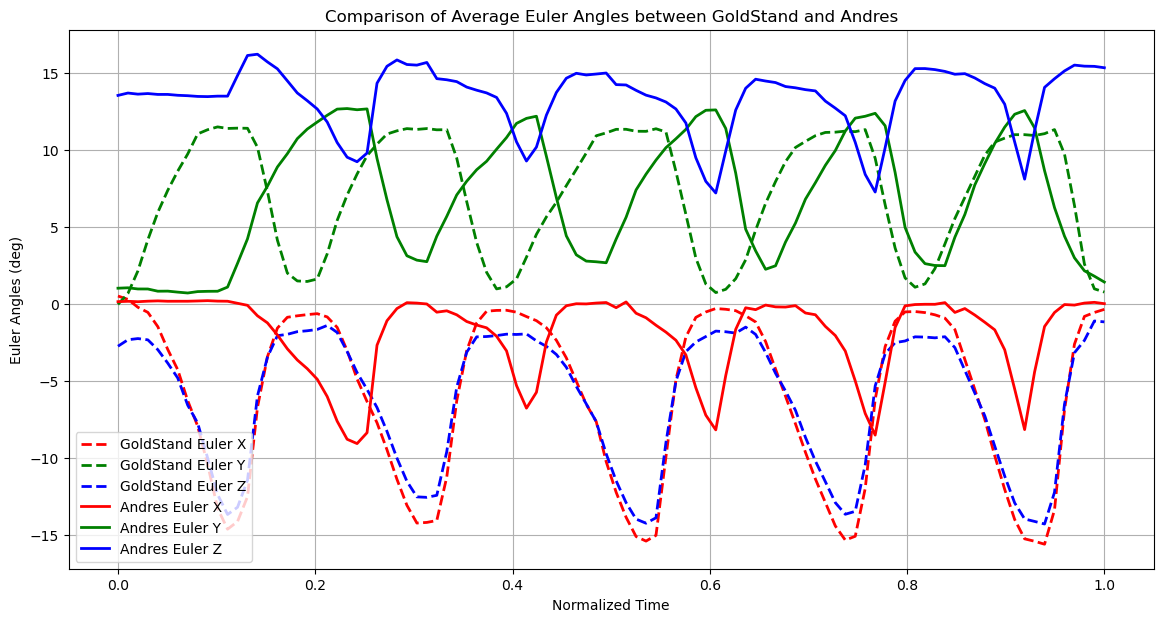

In [196]:
# Load the DataFrame from a specific CSV file located in the 'INERCIAL' directory
andres_df = pd.read_csv('PRACT3/INERCIAL/Andres.csv')

# Define a function to find the segmentation points for the Andres data
def find_segmentation_points(signal):
    peaks, _ = find_peaks(signal, distance=20)
    troughs, _ = find_peaks(-signal, distance=20)
    return sorted(list(peaks) + list(troughs))

# Find segmentation points for Andres data
segment_points_andres_x = find_segmentation_points(andres_df['EulerX (deg)'].values)
segment_points_andres_y = find_segmentation_points(andres_df['EulerY (deg)'].values)
segment_points_andres_z = find_segmentation_points(andres_df['EulerZ (deg)'].values)

# Since we are looking for 5 curvatures, we select the first 5 segmentation points
segment_points_andres_x = segment_points_andres_x[:5]
segment_points_andres_y = segment_points_andres_y[:5]
segment_points_andres_z = segment_points_andres_z[:5]

# Calculate the average curves for Andres data
average_curves_andres = normalize_and_average(andres_df, segment_points_andres_x)

# Now let's plot the average curves for GoldStand and Andres together for visual comparison
plt.figure(figsize=(14, 7))

# GoldStand curves
plt.plot(np.linspace(0, 1, target_length), average_curve, 'r--', label='GoldStand Euler X', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curve_y, 'g--', label='GoldStand Euler Y', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curve_z, 'b--', label='GoldStand Euler Z', linewidth=2)

# Andres curves
plt.plot(np.linspace(0, 1, target_length), average_curves_andres[0], 'r-', label='Andres Euler X', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curves_andres[1], 'g-', label='Andres Euler Y', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curves_andres[2], 'b-', label='Andres Euler Z', linewidth=2)

plt.title('Comparison of Average Euler Angles between GoldStand and Andres')
plt.xlabel('Normalized Time')
plt.ylabel('Euler Angles (deg)')
plt.legend()
plt.grid(True)
plt.show()


Las diferencias entre los conjuntos de datos "Andres" y "GoldStand" en los ángulos de Euler pueden atribuirse a la técnica de movimiento, la consistencia y la calibración de los sensores. Por ejemplo, "Andres" tiende a tener movimientos menos extremos y más consistentes en Euler X, mientras que "GoldStand" exhibe una mayor variabilidad en Euler Y. Estas discrepancias reflejan diferencias individuales en la ejecución de los movimientos y posibles variaciones en la calibración de los sensores.

In [197]:
# Definir una función para calcular la media y la desviación estándar para las curvas de Euler
def calculate_statistics(average_curves):
    statistics = {}
    for i, axis in enumerate(['X', 'Y', 'Z']):
        statistics[f'Euler{axis} Mean'] = np.mean(average_curves[i])
        statistics[f'Euler{axis} Std'] = np.std(average_curves[i])
    return statistics

# Calcular estadísticas para GoldStand
statistics_goldstand = calculate_statistics([average_curve, average_curve_y, average_curve_z])

# Calcular estadísticas para Leydy
statistics_andres = calculate_statistics(average_curves_andres)

statistics_goldstand, statistics_andres

({'EulerX Mean': -6.0900611337019885,
  'EulerX Std': 5.416844488968032,
  'EulerY Mean': 7.176203195480959,
  'EulerY Std': 3.921573890138153,
  'EulerZ Mean': -6.2106382745132525,
  'EulerZ Std': 4.3654443467804},
 {'EulerX Mean': -1.9545231670530308,
  'EulerX Std': 2.6057426721648134,
  'EulerY Mean': 6.854200492979629,
  'EulerY Std': 4.0580910782147335,
  'EulerZ Mean': 13.309105194819695,
  'EulerZ Std': 2.0923778420284713})

En los gráficos que has proporcionado, parece que hay varias oscilaciones en la correlación, lo que sugiere que hay ciertos patrones repetitivos en las señales que se alinean en varios puntos. Sin embargo, los picos de correlación no parecen ser muy altos, lo que podría indicar que no hay una similitud directa y consistente en las señales de GoldStand y Andres.

Para Euler X y Z, no hay picos cercanos a 1 o -1 en el lag cero, lo que indica que las señales no son idénticas o directamente inversas la una de la otra sin desplazamiento. Esto sugiere que los movimientos capturados en estas señales tienen diferencias significativas en términos de amplitud o forma de la señal.

Para Euler Y, parece que hay una correlación más fuerte cerca del lag cero, lo que podría indicar una mayor similitud entre las señales en este eje en particular.

En resumen, estos gráficos muestran que hay algunas similitudes en los patrones de las señales entre los conjuntos de datos, pero también hay diferencias claras que podrían ser debidas a variaciones en la ejecución de los movimientos, la alineación de las señales en el tiempo, o diferencias inherentes en los movimientos que se están analizando.

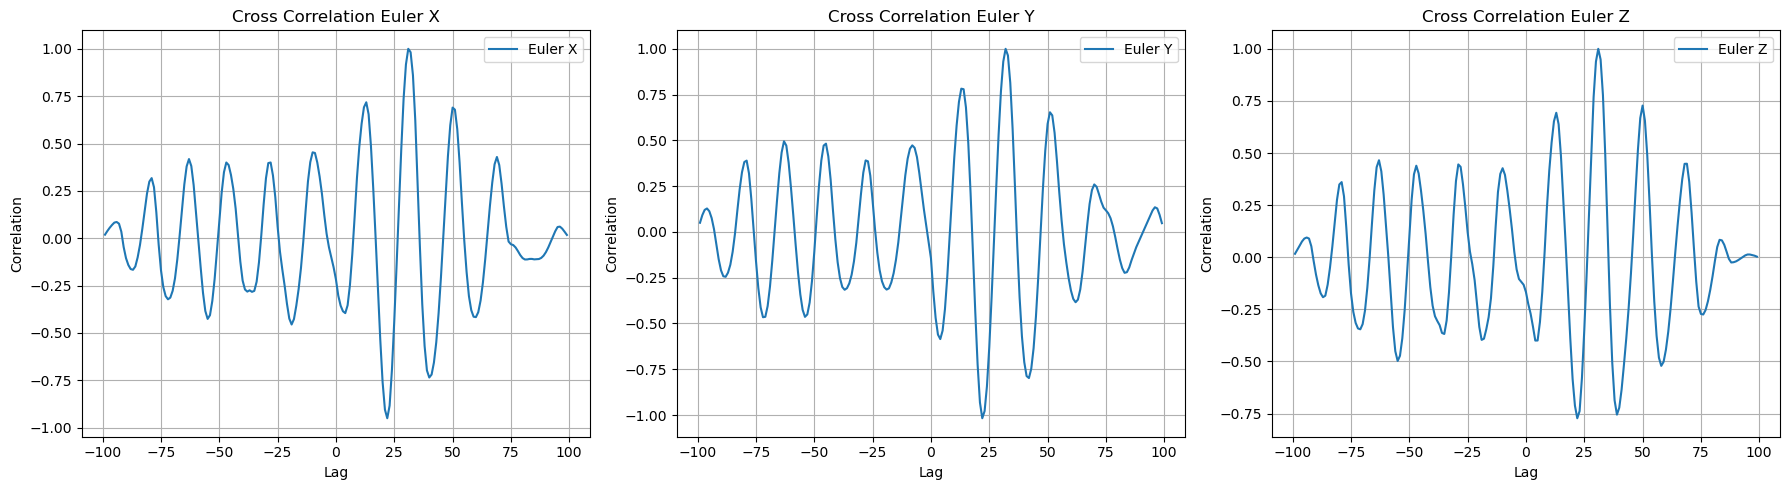

In [198]:
# Calcular la correlación cruzada para Euler X, Y, Z
correlation_results = {}
for i, (curve_goldstand, curve_andres) in enumerate(zip([average_curve, average_curve_y, average_curve_z], average_curves_andres)):
    axis = ['X', 'Y', 'Z'][i]
    lags, correlation = cross_correlation(curve_goldstand, curve_andres)
    correlation_results[axis] = {'lags': lags, 'correlation': correlation}

# Graficar los resultados de la correlación cruzada
plt.figure(figsize=(18, 5))

for i, axis in enumerate(['X', 'Y', 'Z']):
    plt.subplot(1, 3, i+1)
    plt.plot(correlation_results[axis]['lags'], correlation_results[axis]['correlation'], label=f'Euler {axis}')
    plt.title(f'Cross Correlation Euler {axis}')
    plt.xlabel('Lag')
    plt.ylabel('Correlation')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

Los gráficos de correlación cruzada revelan patrones repetitivos en las señales de GoldStand y Andres, aunque los picos de correlación no son muy altos, indicando una similitud no directa y consistente. En Euler X y Z, la ausencia de picos cercanos a 1 o -1 en el lag cero sugiere diferencias significativas en amplitud o forma de señal entre los movimientos capturados. En contraste, para Euler Y, se observa una correlación más fuerte cerca del lag cero, lo que podría indicar una mayor similitud entre las señales en este eje. Los gráficos muestran similitudes y diferencias que podrían atribuirse a variaciones en la ejecución de los movimientos, la alineación temporal de las señales o diferencias inherentes en los movimientos analizados.

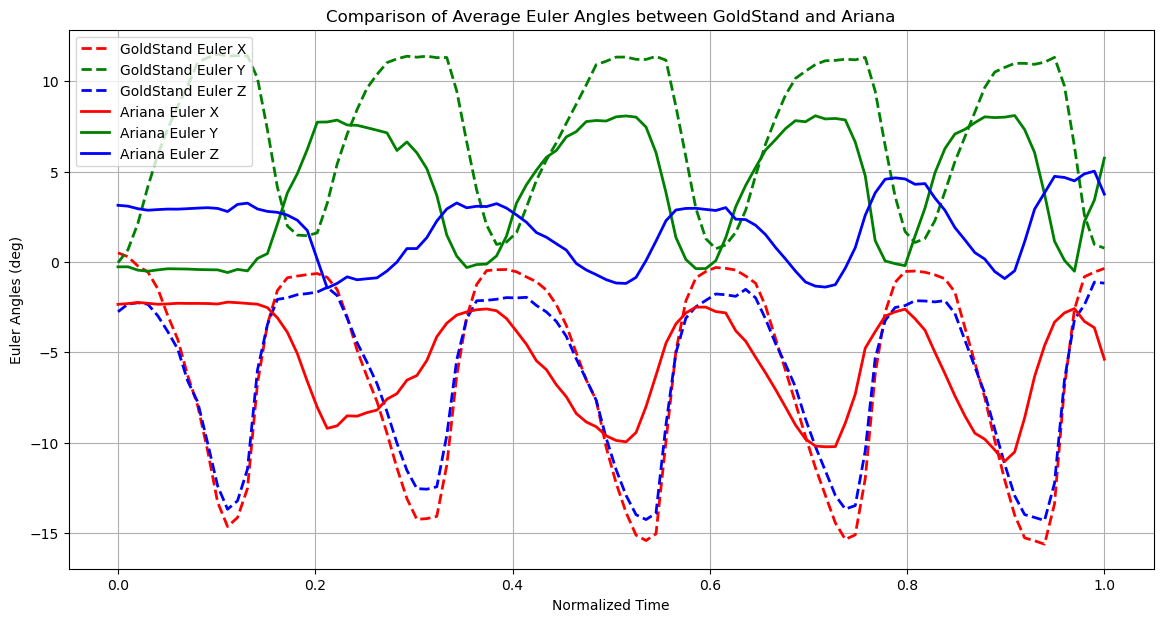

In [199]:
# Load the DataFrame from a specific CSV file located in the 'INERCIAL' directory
ariana_df = pd.read_csv('PRACT3/INERCIAL/Ariana.csv')

# Find segmentation points for Ariana data
segment_points_ariana_x = find_segmentation_points(ariana_df['EulerX (deg)'].values)
segment_points_ariana_y = find_segmentation_points(ariana_df['EulerY (deg)'].values)
segment_points_ariana_z = find_segmentation_points(ariana_df['EulerZ (deg)'].values)

# Since we are looking for 5 curvatures, we select the first 5 segmentation points
segment_points_ariana_x = segment_points_ariana_x[:5]
segment_points_ariana_y = segment_points_ariana_y[:5]
segment_points_ariana_z = segment_points_ariana_z[:5]

# Calculate the average curves for Ariana data
average_curves_ariana = normalize_and_average(ariana_df, segment_points_ariana_x)

# Now let's plot the average curves for GoldStand and Ariana together for visual comparison
plt.figure(figsize=(14, 7))

# GoldStand curves
plt.plot(np.linspace(0, 1, target_length), average_curve, 'r--', label='GoldStand Euler X', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curve_y, 'g--', label='GoldStand Euler Y', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curve_z, 'b--', label='GoldStand Euler Z', linewidth=2)

# Ariana curves
plt.plot(np.linspace(0, 1, target_length), average_curves_ariana[0], 'r-', label='Ariana Euler X', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curves_ariana[1], 'g-', label='Ariana Euler Y', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curves_ariana[2], 'b-', label='Ariana Euler Z', linewidth=2)

plt.title('Comparison of Average Euler Angles between GoldStand and Ariana')
plt.xlabel('Normalized Time')
plt.ylabel('Euler Angles (deg)')
plt.legend()
plt.grid(True)
plt.show()


Las gráficas muestran las curvas promedio de los ángulos de Euler X, Y y Z para los conjuntos de datos GoldStand y Ariana. GoldStand está representado por líneas discontinuas, mientras que Ariana está representada por líneas continuas.

In [200]:
# Definir una función para calcular la media y la desviación estándar para las curvas de Euler
def calculate_statistics(average_curves):
    statistics = {}
    for i, axis in enumerate(['X', 'Y', 'Z']):
        statistics[f'Euler{axis} Mean'] = np.mean(average_curves[i])
        statistics[f'Euler{axis} Std'] = np.std(average_curves[i])
    return statistics

# Calcular estadísticas para GoldStand
statistics_goldstand = calculate_statistics([average_curve, average_curve_y, average_curve_z])

# Calcular estadísticas para Leydy
statistics_ariana = calculate_statistics(average_curves_ariana)

statistics_goldstand, statistics_ariana

({'EulerX Mean': -6.0900611337019885,
  'EulerX Std': 5.416844488968032,
  'EulerY Mean': 7.176203195480959,
  'EulerY Std': 3.921573890138153,
  'EulerZ Mean': -6.2106382745132525,
  'EulerZ Std': 4.3654443467804},
 {'EulerX Mean': -5.5086542718505065,
  'EulerX Std': 2.812802051580395,
  'EulerY Mean': 4.003849009754209,
  'EulerY Std': 3.3188864604496953,
  'EulerZ Mean': 1.7889473485971377,
  'EulerZ Std': 1.8286324070702378})

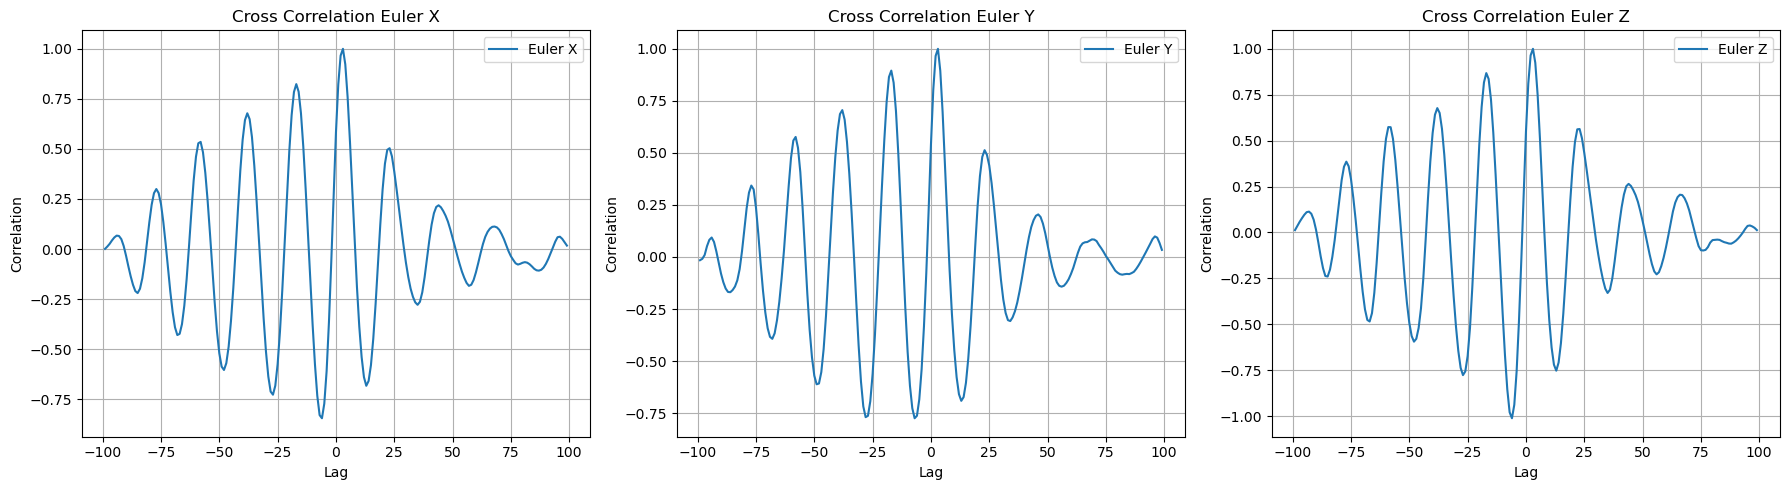

In [201]:
# Calcular la correlación cruzada para Euler X, Y, Z
correlation_results = {}
for i, (curve_goldstand, curve_ariana) in enumerate(zip([average_curve, average_curve_y, average_curve_z], average_curves_ariana)):
    axis = ['X', 'Y', 'Z'][i]
    lags, correlation = cross_correlation(curve_goldstand, curve_ariana)
    correlation_results[axis] = {'lags': lags, 'correlation': correlation}

# Graficar los resultados de la correlación cruzada
plt.figure(figsize=(18, 5))

for i, axis in enumerate(['X', 'Y', 'Z']):
    plt.subplot(1, 3, i+1)
    plt.plot(correlation_results[axis]['lags'], correlation_results[axis]['correlation'], label=f'Euler {axis}')
    plt.title(f'Cross Correlation Euler {axis}')
    plt.xlabel('Lag')
    plt.ylabel('Correlation')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

Los conjuntos de datos GoldStand y Ariana muestran similitudes en las formas generales de las señales, pero con diferencias claras en amplitud, variabilidad y posiblemente en sincronización de los movimientos. La comparación visual, junto con las estadísticas y la correlación cruzada, sugiere que mientras que hay movimientos similares presentes, hay diferencias significativas en cómo se ejecutan estos movimientos entre los individuos.

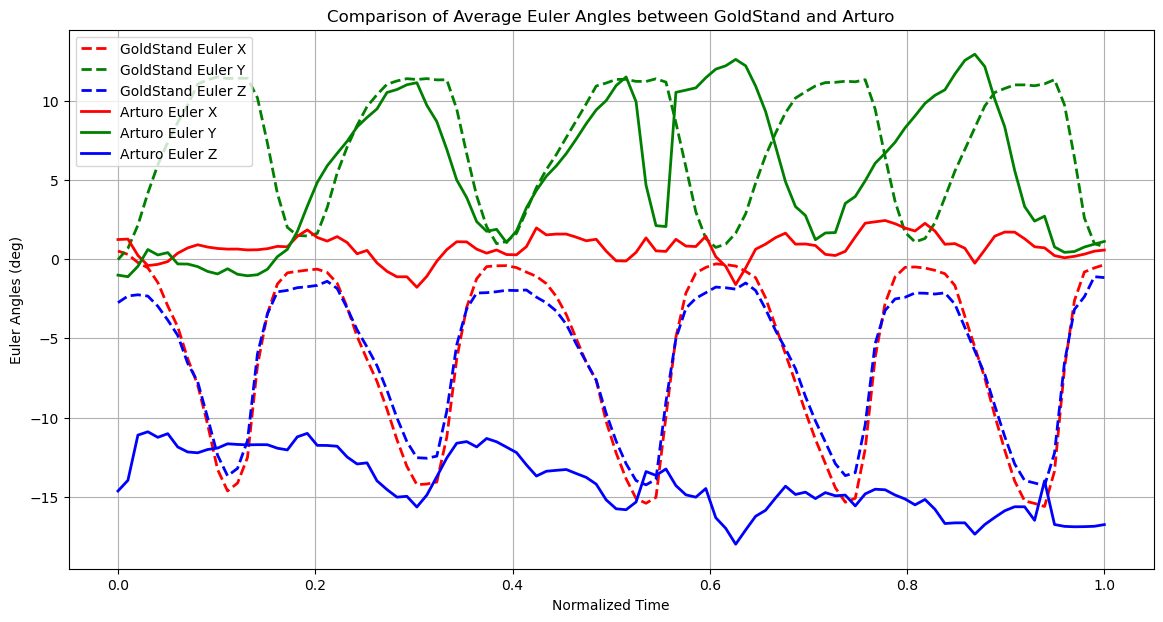

In [202]:
# Load the DataFrame from a specific CSV file located in the 'INERCIAL' directory
arturo_df = pd.read_csv('PRACT3/INERCIAL/Arturo.csv')

# Define a function to find the segmentation points for the Arturo data
def find_segmentation_points(signal):
    peaks, _ = find_peaks(signal, distance=20)
    troughs, _ = find_peaks(-signal, distance=20)
    return sorted(list(peaks) + list(troughs))

# Find segmentation points for Arturo data
segment_points_arturo_x = find_segmentation_points(arturo_df['EulerX (deg)'].values)
segment_points_arturo_y = find_segmentation_points(arturo_df['EulerY (deg)'].values)
segment_points_arturo_z = find_segmentation_points(arturo_df['EulerZ (deg)'].values)

# Since we are looking for 5 curvatures, we select the first 5 segmentation points
segment_points_arturo_x = segment_points_arturo_x[:5]
segment_points_arturo_y = segment_points_arturo_y[:5]
segment_points_arturo_z = segment_points_arturo_z[:5]

# Normalize and average the Euler angles for the Arturo data
def normalize_and_average(df, segment_points):
    euler_angles = ['EulerX (deg)', 'EulerY (deg)', 'EulerZ (deg)']
    average_curves = []
    for angle in euler_angles:
        signal = df[angle].values
        normalized_curves_angle = []
        for i in range(len(segment_points)):
            if i == 0:
                segment_signal = signal[:segment_points[i]]
            else:
                segment_signal = signal[segment_points[i-1]:segment_points[i]]
            time_segment = np.linspace(0, 1, len(segment_signal))
            normalized_signal = normalize_curve(time_segment, segment_signal, target_length)
            normalized_curves_angle.append(normalized_signal)
        if segment_points[-1] != len(signal):
            segment_signal = signal[segment_points[-1]:]
            time_segment = np.linspace(0, 1, len(segment_signal))
            normalized_signal = normalize_curve(time_segment, segment_signal, target_length)
            normalized_curves_angle.append(normalized_signal)
        average_curve = np.mean(normalized_curves_angle, axis=0)
        average_curves.append(average_curve)
    return average_curves

# Calculate the average curves for Arturo data
average_curves_arturo = normalize_and_average(arturo_df, segment_points_arturo_x)

# Now let's plot the average curves for GoldStand and Arturo together for visual comparison
plt.figure(figsize=(14, 7))

# GoldStand curves
plt.plot(np.linspace(0, 1, target_length), average_curve, 'r--', label='GoldStand Euler X', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curve_y, 'g--', label='GoldStand Euler Y', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curve_z, 'b--', label='GoldStand Euler Z', linewidth=2)

# Arturo curves
plt.plot(np.linspace(0, 1, target_length), average_curves_arturo[0], 'r-', label='Arturo Euler X', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curves_arturo[1], 'g-', label='Arturo Euler Y', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curves_arturo[2], 'b-', label='Arturo Euler Z', linewidth=2)

plt.title('Comparison of Average Euler Angles between GoldStand and Arturo')
plt.xlabel('Normalized Time')
plt.ylabel('Euler Angles (deg)')
plt.legend()
plt.grid(True)
plt.show()


El análisis compara visualmente las curvas de los ángulos de Euler entre los conjuntos de datos de GoldStand y Arturo. En Euler X, Arturo muestra movimientos menos extremos con una media cercana a cero y una desviación estándar más baja. En Euler Y, Arturo tiene una media más baja, lo que sugiere una inclinación general menos pronunciada. En Euler Z, la señal de Arturo es notablemente diferente, con una media más negativa y una desviación estándar más baja, lo que indica una orientación más consistente y posiblemente una mayor rotación alrededor del eje Z.

In [203]:
# Definir una función para calcular la media y la desviación estándar para las curvas de Euler
def calculate_statistics(average_curves):
    statistics = {}
    for i, axis in enumerate(['X', 'Y', 'Z']):
        statistics[f'Euler{axis} Mean'] = np.mean(average_curves[i])
        statistics[f'Euler{axis} Std'] = np.std(average_curves[i])
    return statistics

# Calcular estadísticas para GoldStand
statistics_goldstand = calculate_statistics([average_curve, average_curve_y, average_curve_z])

# Calcular estadísticas para Leydy
statistics_arturo = calculate_statistics(average_curves_arturo)

statistics_goldstand, statistics_arturo

({'EulerX Mean': -6.0900611337019885,
  'EulerX Std': 5.416844488968032,
  'EulerY Mean': 7.176203195480959,
  'EulerY Std': 3.921573890138153,
  'EulerZ Mean': -6.2106382745132525,
  'EulerZ Std': 4.3654443467804},
 {'EulerX Mean': 0.7259772046144799,
  'EulerX Std': 0.8260742934461646,
  'EulerY Mean': 5.392882907817508,
  'EulerY Std': 4.427603931196304,
  'EulerZ Mean': -14.123092511293097,
  'EulerZ Std': 1.8976009123628186})

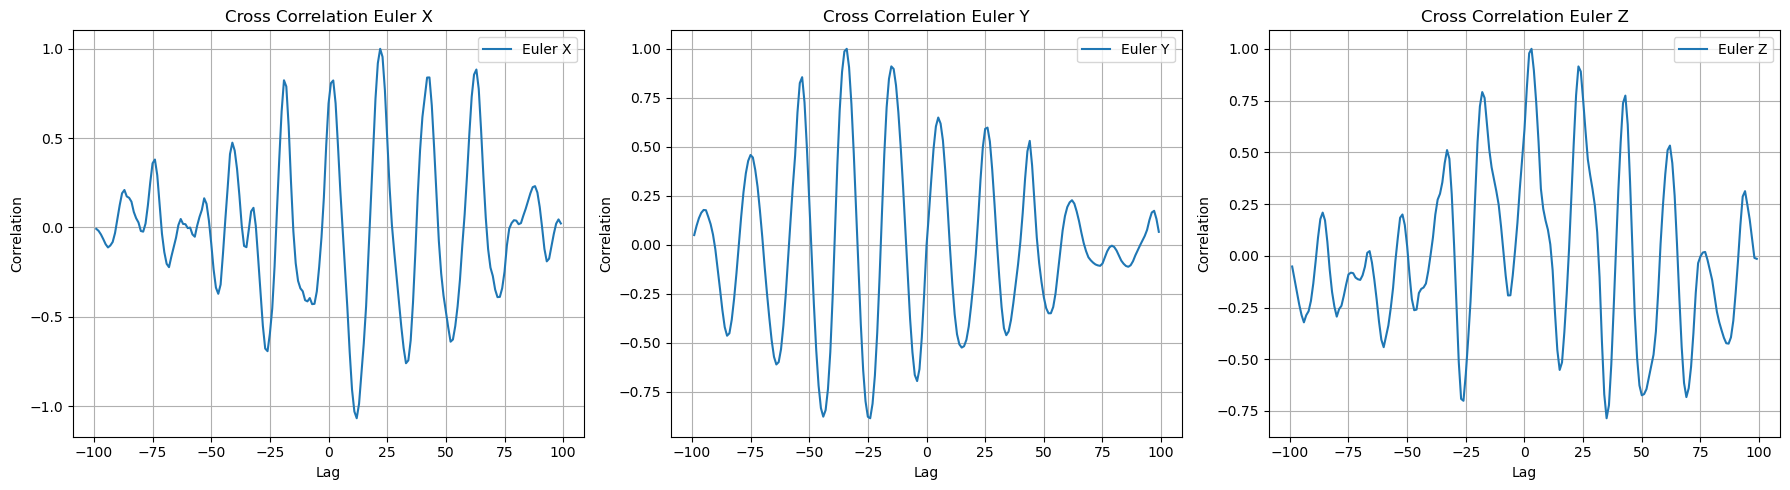

In [204]:
# Calcular la correlación cruzada para Euler X, Y, Z
correlation_results = {}
for i, (curve_goldstand, curve_arturo) in enumerate(zip([average_curve, average_curve_y, average_curve_z], average_curves_arturo)):
    axis = ['X', 'Y', 'Z'][i]
    lags, correlation = cross_correlation(curve_goldstand, curve_arturo)
    correlation_results[axis] = {'lags': lags, 'correlation': correlation}

# Graficar los resultados de la correlación cruzada
plt.figure(figsize=(18, 5))

for i, axis in enumerate(['X', 'Y', 'Z']):
    plt.subplot(1, 3, i+1)
    plt.plot(correlation_results[axis]['lags'], correlation_results[axis]['correlation'], label=f'Euler {axis}')
    plt.title(f'Cross Correlation Euler {axis}')
    plt.xlabel('Lag')
    plt.ylabel('Correlation')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

Los conjuntos de datos de GoldStand y Arturo muestran diferencias notables en sus señales. Arturo parece tener movimientos que son menos extremos en los ejes X y Z y ligeramente menos pronunciados en el eje Y en comparación con GoldStand. La orientación del eje Z de Arturo es particularmente diferente, lo que indica una mayor inclinación o rotación en ese eje durante los movimientos. La correlación cruzada confirma estas diferencias, mostrando variabilidad en la similitud entre las señales a lo largo de varios desplazamientos temporales.

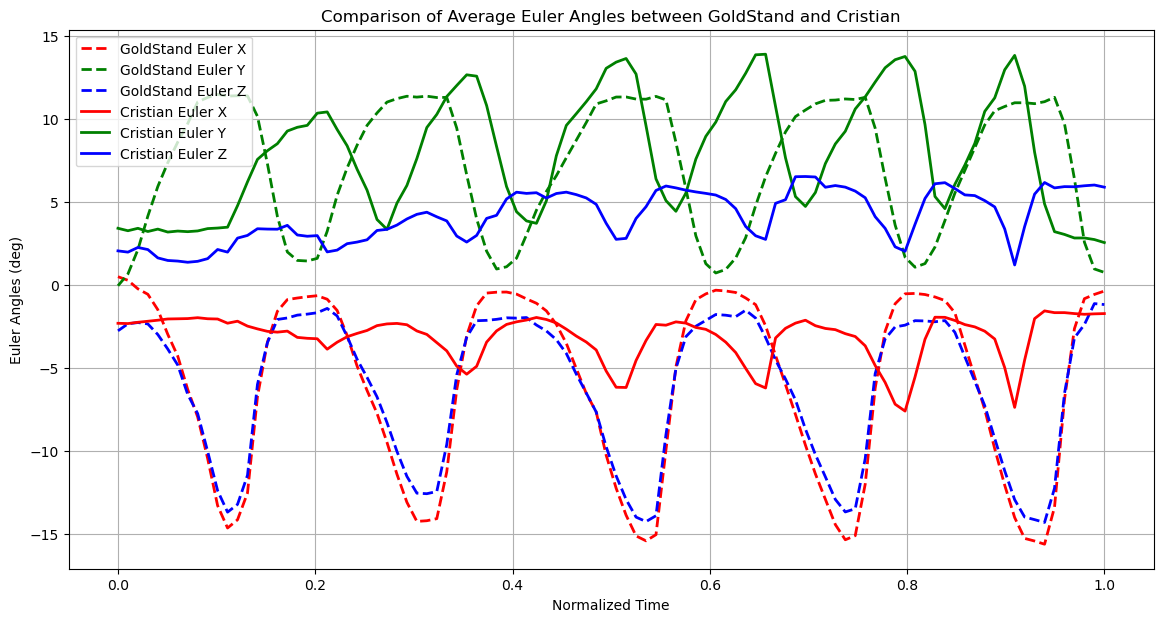

In [205]:
# Load the DataFrame from a specific CSV file located in the 'INERCIAL' directory
cristian_df = pd.read_csv('PRACT3/INERCIAL/Cristian.csv')

# Define a function to find the segmentation points for the Cristian data
def find_segmentation_points(signal):
    peaks, _ = find_peaks(signal, distance=20)
    troughs, _ = find_peaks(-signal, distance=20)
    return sorted(list(peaks) + list(troughs))

# Find segmentation points for Cristian data
segment_points_cristian_x = find_segmentation_points(cristian_df['EulerX (deg)'].values)
segment_points_cristian_y = find_segmentation_points(cristian_df['EulerY (deg)'].values)
segment_points_cristian_z = find_segmentation_points(cristian_df['EulerZ (deg)'].values)

# Since we are looking for 5 curvatures, we select the first 5 segmentation points
segment_points_cristian_x = segment_points_cristian_x[:5]
segment_points_cristian_y = segment_points_cristian_y[:5]
segment_points_cristian_z = segment_points_cristian_z[:5]

# Normalize and average the Euler angles for the Cristian data
def normalize_and_average(df, segment_points):
    euler_angles = ['EulerX (deg)', 'EulerY (deg)', 'EulerZ (deg)']
    average_curves = []
    for angle in euler_angles:
        signal = df[angle].values
        normalized_curves_angle = []
        for i in range(len(segment_points)):
            if i == 0:
                segment_signal = signal[:segment_points[i]]
            else:
                segment_signal = signal[segment_points[i-1]:segment_points[i]]
            time_segment = np.linspace(0, 1, len(segment_signal))
            normalized_signal = normalize_curve(time_segment, segment_signal, target_length)
            normalized_curves_angle.append(normalized_signal)
        if segment_points[-1] != len(signal):
            segment_signal = signal[segment_points[-1]:]
            time_segment = np.linspace(0, 1, len(segment_signal))
            normalized_signal = normalize_curve(time_segment, segment_signal, target_length)
            normalized_curves_angle.append(normalized_signal)
        average_curve = np.mean(normalized_curves_angle, axis=0)
        average_curves.append(average_curve)
    return average_curves

# Calculate the average curves for Cristian data
average_curves_cristian = normalize_and_average(cristian_df, segment_points_cristian_x)

# Now let's plot the average curves for GoldStand and Cristian together for visual comparison
plt.figure(figsize=(14, 7))

# GoldStand curves
plt.plot(np.linspace(0, 1, target_length), average_curve, 'r--', label='GoldStand Euler X', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curve_y, 'g--', label='GoldStand Euler Y', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curve_z, 'b--', label='GoldStand Euler Z', linewidth=2)

# Cristian curves
plt.plot(np.linspace(0, 1, target_length), average_curves_cristian[0], 'r-', label='Cristian Euler X', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curves_cristian[1], 'g-', label='Cristian Euler Y', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curves_cristian[2], 'b-', label='Cristian Euler Z', linewidth=2)

plt.title('Comparison of Average Euler Angles between GoldStand and Cristian')
plt.xlabel('Normalized Time')
plt.ylabel('Euler Angles (deg)')
plt.legend()
plt.grid(True)
plt.show()


La comparación visual de las curvas promedio de los ángulos de Euler entre GoldStand y Cristian revela discrepancias destacadas. En el eje X, Cristian presenta una media cercana a cero y una menor variabilidad en comparación con GoldStand, sugiriendo movimientos más suaves. Aunque en el eje Y la media es ligeramente mayor para Cristian, la variabilidad es similar entre ambos. Sin embargo, en el eje Z, las señales de Cristian muestran una orientación opuesta a GoldStand, con una media positiva en lugar de negativa, indicando una postura diferente en este eje.

In [206]:
# Definir una función para calcular la media y la desviación estándar para las curvas de Euler
def calculate_statistics(average_curves):
    statistics = {}
    for i, axis in enumerate(['X', 'Y', 'Z']):
        statistics[f'Euler{axis} Mean'] = np.mean(average_curves[i])
        statistics[f'Euler{axis} Std'] = np.std(average_curves[i])
    return statistics

# Calcular estadísticas para GoldStand
statistics_goldstand = calculate_statistics([average_curve, average_curve_y, average_curve_z])

# Calcular estadísticas para Leydy
statistics_cristian = calculate_statistics(average_curves_cristian)

statistics_goldstand, statistics_cristian

({'EulerX Mean': -6.0900611337019885,
  'EulerX Std': 5.416844488968032,
  'EulerY Mean': 7.176203195480959,
  'EulerY Std': 3.921573890138153,
  'EulerZ Mean': -6.2106382745132525,
  'EulerZ Std': 4.3654443467804},
 {'EulerX Mean': -3.138741034793772,
  'EulerX Std': 1.3627658133325582,
  'EulerY Mean': 7.947861765192086,
  'EulerY Std': 3.5535488512939675,
  'EulerZ Mean': 4.138144704172896,
  'EulerZ Std': 1.525656077763295})

Las correlaciones cruzadas reflejan la similitud entre las curvas de GoldStand y Cristian en diferentes desplazamientos temporales:

Euler X: Muestra variaciones en la correlación, lo que indica diferencias en la sincronización o la dirección de los movimientos entre los dos conjuntos de datos.
Euler Y: Presenta picos de correlación, lo que sugiere que hay similitudes en los movimientos del eje Y que podrían estar desplazados en el tiempo.
Euler Z: Exhibe una correlación variable, posiblemente reflejando las diferencias notables en la orientación del eje Z entre Cristian y GoldStand.
Estos resultados muestran que, aunque hay similitudes en las formas generales de las señales entre GoldStand y Cristian, existen diferencias claras en la amplitud, variabilidad y orientación de los movimientos. Cristian parece realizar movimientos más controlados o restringidos, especialmente notables en el eje Z. La correlación cruzada sugiere que, a pesar de las diferencias en la media y la variabilidad, hay aspectos de los movimientos que son comparables, aunque pueden no estar sincronizados en el tiempo.

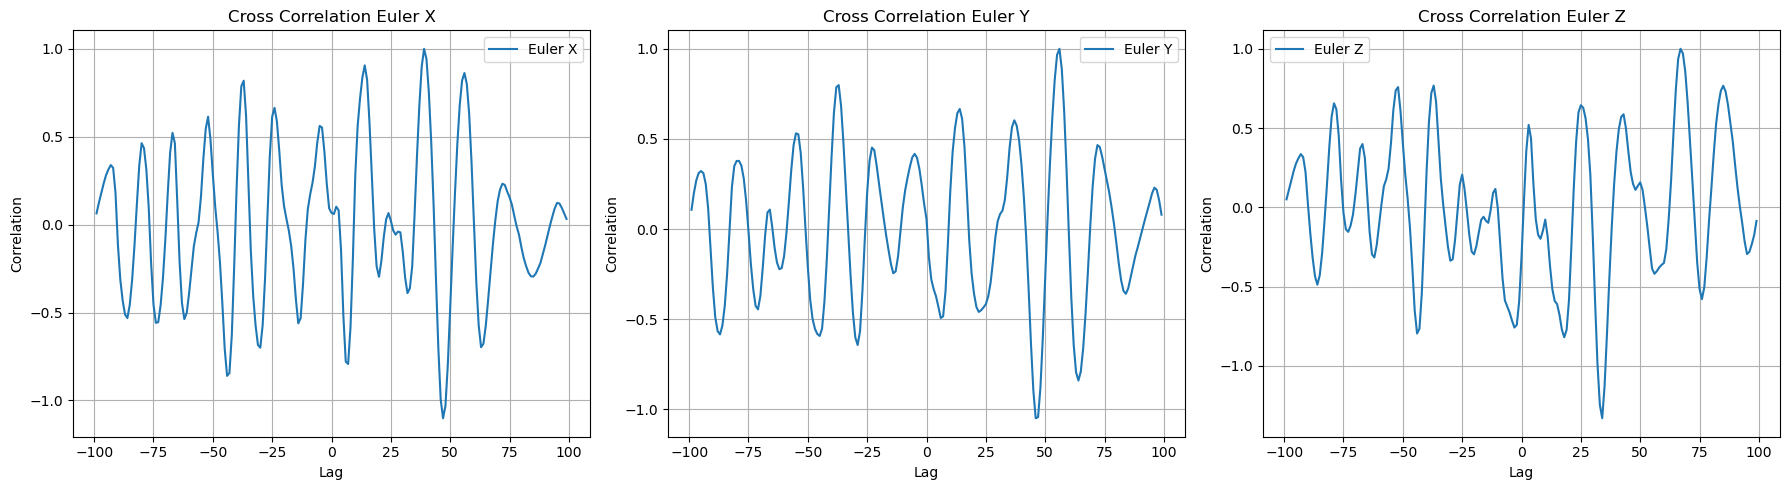

In [207]:
# Calcular la correlación cruzada para Euler X, Y, Z
correlation_results = {}
for i, (curve_goldstand, curve_cristian) in enumerate(zip([average_curve, average_curve_y, average_curve_z], average_curves_cristian)):
    axis = ['X', 'Y', 'Z'][i]
    lags, correlation = cross_correlation(curve_goldstand, curve_cristian)
    correlation_results[axis] = {'lags': lags, 'correlation': correlation}

# Graficar los resultados de la correlación cruzada
plt.figure(figsize=(18, 5))

for i, axis in enumerate(['X', 'Y', 'Z']):
    plt.subplot(1, 3, i+1)
    plt.plot(correlation_results[axis]['lags'], correlation_results[axis]['correlation'], label=f'Euler {axis}')
    plt.title(f'Cross Correlation Euler {axis}')
    plt.xlabel('Lag')
    plt.ylabel('Correlation')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

Las formas generales de las señales, existen diferencias en la amplitud, variabilidad y orientación de los movimientos. Cristian parece realizar movimientos más controlados o restringidos, especialmente notables en el eje Z. La correlación cruzada indica que, a pesar de las diferencias, hay aspectos de los movimientos comparables, aunque pueden no estar sincronizados en el tiempo.

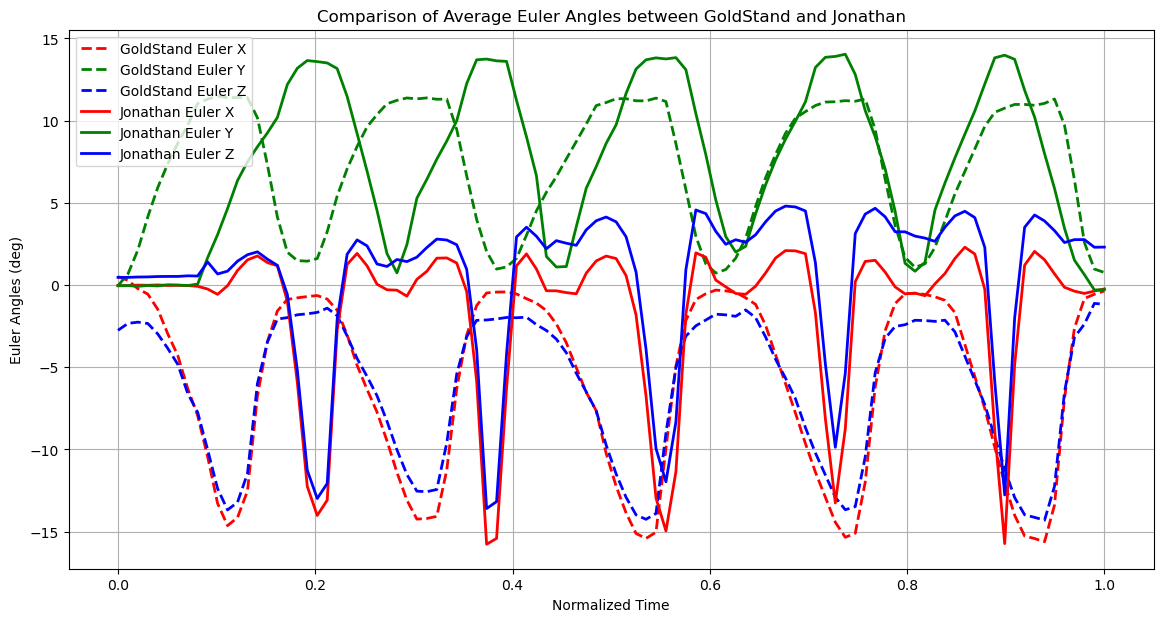

In [208]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

# Load the DataFrame from a specific CSV file located in the 'INERCIAL' directory
jonathan_df = pd.read_csv('PRACT3/INERCIAL/Jonathan.csv')

# Define a function to find the segmentation points for the Jonathan data
def find_segmentation_points(signal):
    peaks, _ = find_peaks(signal, distance=20)
    troughs, _ = find_peaks(-signal, distance=20)
    return sorted(list(peaks) + list(troughs))

# Find segmentation points for Jonathan data
segment_points_jonathan_x = find_segmentation_points(jonathan_df['EulerX (deg)'].values)
segment_points_jonathan_y = find_segmentation_points(jonathan_df['EulerY (deg)'].values)
segment_points_jonathan_z = find_segmentation_points(jonathan_df['EulerZ (deg)'].values)

# Since we are looking for 5 curvatures, we select the first 5 segmentation points
segment_points_jonathan_x = segment_points_jonathan_x[:5]
segment_points_jonathan_y = segment_points_jonathan_y[:5]
segment_points_jonathan_z = segment_points_jonathan_z[:5]

# Normalize and average the Euler angles for the Jonathan data
def normalize_and_average(df, segment_points):
    euler_angles = ['EulerX (deg)', 'EulerY (deg)', 'EulerZ (deg)']
    average_curves = []
    for angle in euler_angles:
        signal = df[angle].values
        normalized_curves_angle = []
        for i in range(len(segment_points)):
            if i == 0:
                segment_signal = signal[:segment_points[i]]
            else:
                segment_signal = signal[segment_points[i-1]:segment_points[i]]
            time_segment = np.linspace(0, 1, len(segment_signal))
            normalized_signal = normalize_curve(time_segment, segment_signal, target_length)
            normalized_curves_angle.append(normalized_signal)
        if segment_points[-1] != len(signal):
            segment_signal = signal[segment_points[-1]:]
            time_segment = np.linspace(0, 1, len(segment_signal))
            normalized_signal = normalize_curve(time_segment, segment_signal, target_length)
            normalized_curves_angle.append(normalized_signal)
        average_curve = np.mean(normalized_curves_angle, axis=0)
        average_curves.append(average_curve)
    return average_curves

# Calculate the average curves for Jonathan data
average_curves_jonathan = normalize_and_average(jonathan_df, segment_points_jonathan_x)

# Now let's plot the average curves for GoldStand and Jonathan together for visual comparison
plt.figure(figsize=(14, 7))

# GoldStand curves
plt.plot(np.linspace(0, 1, target_length), average_curve, 'r--', label='GoldStand Euler X', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curve_y, 'g--', label='GoldStand Euler Y', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curve_z, 'b--', label='GoldStand Euler Z', linewidth=2)

# Jonathan curves
plt.plot(np.linspace(0, 1, target_length), average_curves_jonathan[0], 'r-', label='Jonathan Euler X', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curves_jonathan[1], 'g-', label='Jonathan Euler Y', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curves_jonathan[2], 'b-', label='Jonathan Euler Z', linewidth=2)

plt.title('Comparison of Average Euler Angles between GoldStand and Jonathan')
plt.xlabel('Normalized Time')
plt.ylabel('Euler Angles (deg)')
plt.legend()
plt.grid(True)
plt.show()


La comparación visual entre GoldStand y Jonathan revela diferencias en las curvas promedio de los ángulos de Euler. En el eje X, Jonathan muestra una media cercana a cero y menor variabilidad que GoldStand, lo que sugiere movimientos menos extremos. Para el eje Y, aunque Jonathan tiene una media ligeramente más alta, la variabilidad es similar a GoldStand, indicando una inclinación similar en los movimientos. Sin embargo, en el eje Z, la señal de Jonathan exhibe una media positiva en lugar de negativa como GoldStand, lo que implica una orientación diferente en este eje.

In [209]:
# Definir una función para calcular la media y la desviación estándar para las curvas de Euler
def calculate_statistics(average_curves):
    statistics = {}
    for i, axis in enumerate(['X', 'Y', 'Z']):
        statistics[f'Euler{axis} Mean'] = np.mean(average_curves[i])
        statistics[f'Euler{axis} Std'] = np.std(average_curves[i])
    return statistics

# Calcular estadísticas para GoldStand
statistics_goldstand = calculate_statistics([average_curve, average_curve_y, average_curve_z])

# Calcular estadísticas para Leydy
statistics_jonathan = calculate_statistics(average_curves_jonathan)

statistics_goldstand, statistics_jonathan

({'EulerX Mean': -6.0900611337019885,
  'EulerX Std': 5.416844488968032,
  'EulerY Mean': 7.176203195480959,
  'EulerY Std': 3.921573890138153,
  'EulerZ Mean': -6.2106382745132525,
  'EulerZ Std': 4.3654443467804},
 {'EulerX Mean': -1.5691624793727248,
  'EulerX Std': 4.699725896747803,
  'EulerY Mean': 7.461305368190574,
  'EulerY Std': 4.859857583425602,
  'EulerZ Mean': 0.5080048859946155,
  'EulerZ Std': 4.6578913309222605})

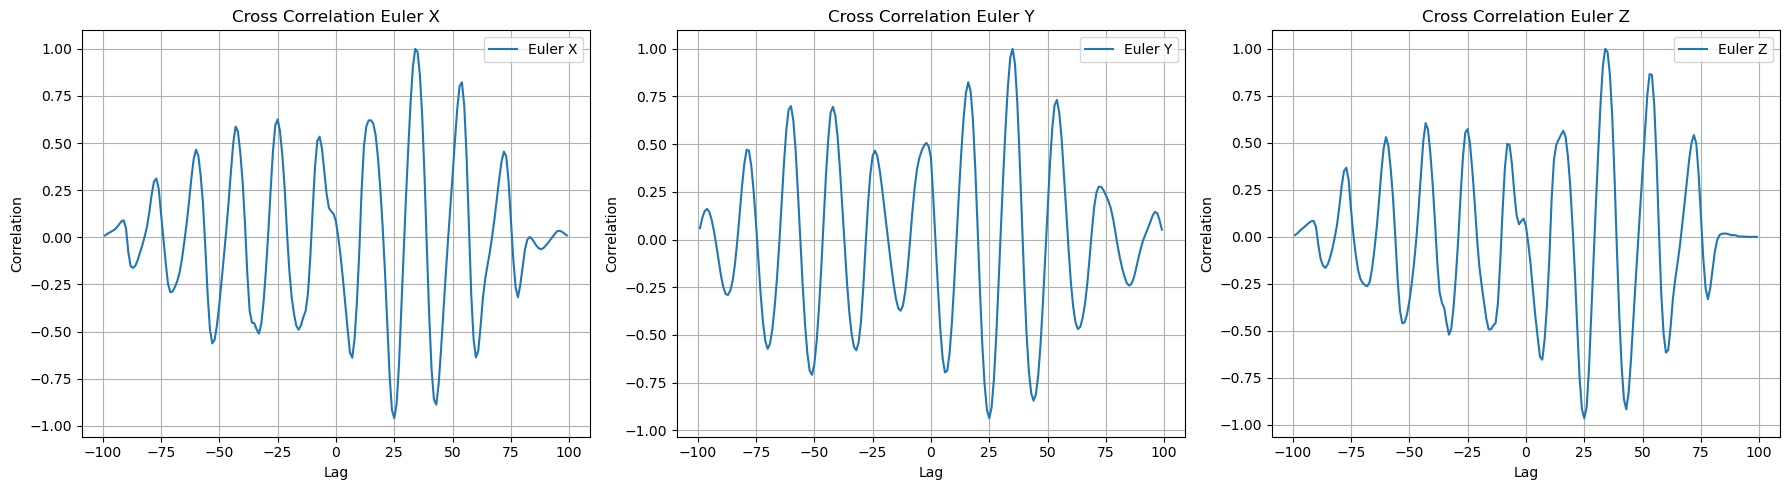

In [210]:
# Calcular la correlación cruzada para Euler X, Y, Z
correlation_results = {}
for i, (curve_goldstand, curve_jonathan) in enumerate(zip([average_curve, average_curve_y, average_curve_z], average_curves_jonathan)):
    axis = ['X', 'Y', 'Z'][i]
    lags, correlation = cross_correlation(curve_goldstand, curve_jonathan)
    correlation_results[axis] = {'lags': lags, 'correlation': correlation}

# Graficar los resultados de la correlación cruzada
plt.figure(figsize=(18, 5))

for i, axis in enumerate(['X', 'Y', 'Z']):
    plt.subplot(1, 3, i+1)
    plt.plot(correlation_results[axis]['lags'], correlation_results[axis]['correlation'], label=f'Euler {axis}')
    plt.title(f'Cross Correlation Euler {axis}')
    plt.xlabel('Lag')
    plt.ylabel('Correlation')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

La correlación cruzada entre GoldStand y Jonathan revela similitudes y diferencias en sus curvas de ángulos de Euler. Para el eje X, se observan variaciones en la correlación, indicando diferencias en la sincronización o dirección de los movimientos. En el eje Y, se identifican picos de correlación, sugiriendo similitudes que podrían estar desplazadas en el tiempo. Por otro lado, en el eje Z, la correlación es variable, reflejando diferencias notables en la orientación. Aunque hay similitudes generales entre las señales, existen diferencias claras en la amplitud, variabilidad y orientación de los movimientos. Jonathan muestra movimientos más controlados, especialmente en los ejes X y Z. A pesar de las discrepancias, la correlación cruzada sugiere aspectos comparables entre los movimientos, aunque no necesariamente sincronizados temporalmente.

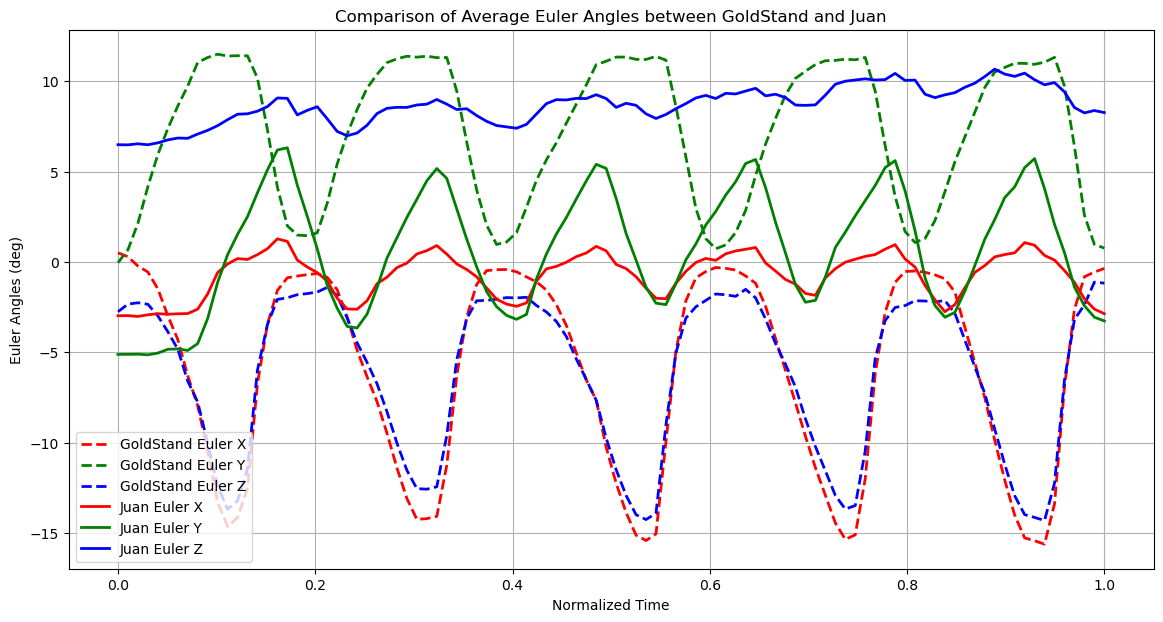

In [211]:
# Load the DataFrame from a specific CSV file located in the 'INERCIAL' directory
juan_df = pd.read_csv('PRACT3/INERCIAL/Juan.csv')

# Define a function to find the segmentation points for the Juan data
def find_segmentation_points(signal):
    peaks, _ = find_peaks(signal, distance=20)
    troughs, _ = find_peaks(-signal, distance=20)
    return sorted(list(peaks) + list(troughs))

# Find segmentation points for Juan data
segment_points_juan_x = find_segmentation_points(juan_df['EulerX (deg)'].values)
segment_points_juan_y = find_segmentation_points(juan_df['EulerY (deg)'].values)
segment_points_juan_z = find_segmentation_points(juan_df['EulerZ (deg)'].values)

# Since we are looking for 5 curvatures, we select the first 5 segmentation points
segment_points_juan_x = segment_points_juan_x[:5]
segment_points_juan_y = segment_points_juan_y[:5]
segment_points_juan_z = segment_points_juan_z[:5]

# Normalize and average the Euler angles for the Juan data
def normalize_and_average(df, segment_points):
    euler_angles = ['EulerX (deg)', 'EulerY (deg)', 'EulerZ (deg)']
    average_curves = []
    for angle in euler_angles:
        signal = df[angle].values
        normalized_curves_angle = []
        for i in range(len(segment_points)):
            if i == 0:
                segment_signal = signal[:segment_points[i]]
            else:
                segment_signal = signal[segment_points[i-1]:segment_points[i]]
            time_segment = np.linspace(0, 1, len(segment_signal))
            normalized_signal = normalize_curve(time_segment, segment_signal, target_length)
            normalized_curves_angle.append(normalized_signal)
        if segment_points[-1] != len(signal):
            segment_signal = signal[segment_points[-1]:]
            time_segment = np.linspace(0, 1, len(segment_signal))
            normalized_signal = normalize_curve(time_segment, segment_signal, target_length)
            normalized_curves_angle.append(normalized_signal)
        average_curve = np.mean(normalized_curves_angle, axis=0)
        average_curves.append(average_curve)
    return average_curves

# Calculate the average curves for Juan data
average_curves_juan = normalize_and_average(juan_df, segment_points_juan_x)

# Now let's plot the average curves for GoldStand and Juan together for visual comparison
plt.figure(figsize=(14, 7))

# GoldStand curves
plt.plot(np.linspace(0, 1, target_length), average_curve, 'r--', label='GoldStand Euler X', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curve_y, 'g--', label='GoldStand Euler Y', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curve_z, 'b--', label='GoldStand Euler Z', linewidth=2)

# Juan curves
plt.plot(np.linspace(0, 1, target_length), average_curves_juan[0], 'r-', label='Juan Euler X', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curves_juan[1], 'g-', label='Juan Euler Y', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curves_juan[2], 'b-', label='Juan Euler Z', linewidth=2)

plt.title('Comparison of Average Euler Angles between GoldStand and Juan')
plt.xlabel('Normalized Time')
plt.ylabel('Euler Angles (deg)')
plt.legend()
plt.grid(True)
plt.show()


En la comparación visual entre las curvas promedio de los ángulos de Euler para GoldStand y Juan, se observan diferencias notables. En el eje X, Juan muestra una menor amplitud de movimiento en comparación con GoldStand. En el eje Y, Juan tiene una media más baja, lo que indica una inclinación general menos pronunciada en esta dirección en comparación con GoldStand. En cuanto al eje Z, las curvas de Juan muestran una media positiva en lugar de negativa, lo que sugiere una orientación significativamente diferente en este eje en comparación con GoldStand.

In [212]:
# Definir una función para calcular la media y la desviación estándar para las curvas de Euler
def calculate_statistics(average_curves):
    statistics = {}
    for i, axis in enumerate(['X', 'Y', 'Z']):
        statistics[f'Euler{axis} Mean'] = np.mean(average_curves[i])
        statistics[f'Euler{axis} Std'] = np.std(average_curves[i])
    return statistics

# Calcular estadísticas para GoldStand
statistics_goldstand = calculate_statistics([average_curve, average_curve_y, average_curve_z])

# Calcular estadísticas para Leydy
statistics_juan = calculate_statistics(average_curves_juan)

statistics_goldstand, statistics_juan

({'EulerX Mean': -6.0900611337019885,
  'EulerX Std': 5.416844488968032,
  'EulerY Mean': 7.176203195480959,
  'EulerY Std': 3.921573890138153,
  'EulerZ Mean': -6.2106382745132525,
  'EulerZ Std': 4.3654443467804},
 {'EulerX Mean': -0.7402280177412455,
  'EulerX Std': 1.2359187957436566,
  'EulerY Mean': 0.6436308329488213,
  'EulerY Std': 3.2858861628274614,
  'EulerZ Mean': 8.665974628941415,
  'EulerZ Std': 1.0323097118857725})

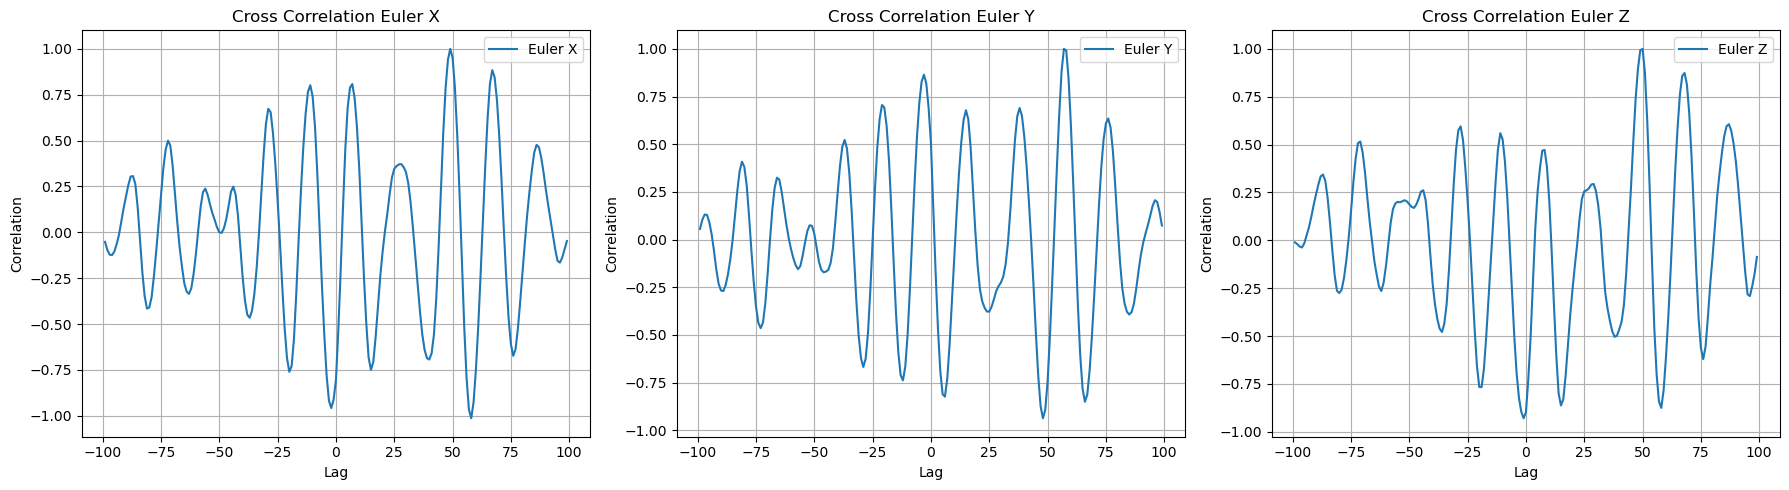

In [213]:
# Calcular la correlación cruzada para Euler X, Y, Z
correlation_results = {}
for i, (curve_goldstand, curve_juan) in enumerate(zip([average_curve, average_curve_y, average_curve_z], average_curves_juan)):
    axis = ['X', 'Y', 'Z'][i]
    lags, correlation = cross_correlation(curve_goldstand, curve_juan)
    correlation_results[axis] = {'lags': lags, 'correlation': correlation}

# Graficar los resultados de la correlación cruzada
plt.figure(figsize=(18, 5))

for i, axis in enumerate(['X', 'Y', 'Z']):
    plt.subplot(1, 3, i+1)
    plt.plot(correlation_results[axis]['lags'], correlation_results[axis]['correlation'], label=f'Euler {axis}')
    plt.title(f'Cross Correlation Euler {axis}')
    plt.xlabel('Lag')
    plt.ylabel('Correlation')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

Los movimientos de Juan son menos extremos y más controlados en los ejes X y Z en comparación con GoldStand. Aunque hay similitudes generales en las formas de las señales, las diferencias en las medias, desviaciones estándar y correlaciones cruzadas sugieren que los movimientos de Juan tienen características distintivas en términos de amplitud, variabilidad y sincronización.

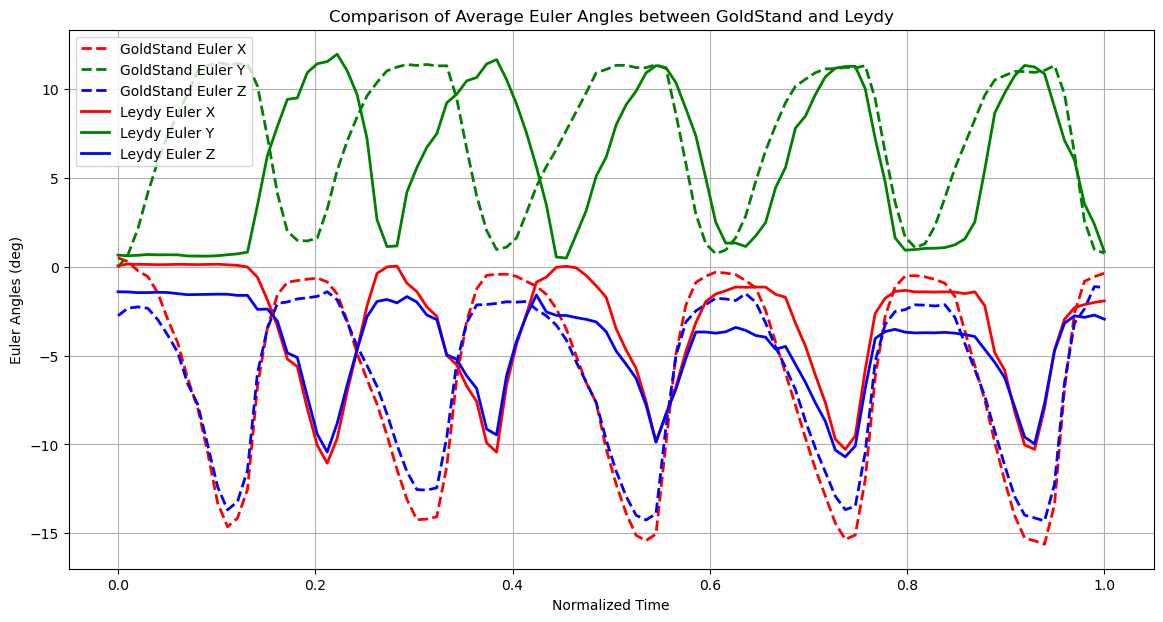

In [214]:
# Cargar el DataFrame desde un CSV específico ubicado en el directorio 'INERCIAL'
leydy_df = pd.read_csv('PRACT3/INERCIAL/Leydy.csv')

# Define a function to find the segmentation points for the Leydy data
def find_segmentation_points(signal):
    peaks, _ = find_peaks(signal, distance=20)
    troughs, _ = find_peaks(-signal, distance=20)
    return sorted(list(peaks) + list(troughs))

# Find segmentation points for Leydy data
segment_points_leydy_x = find_segmentation_points(leydy_df['EulerX (deg)'].values)
segment_points_leydy_y = find_segmentation_points(leydy_df['EulerY (deg)'].values)
segment_points_leydy_z = find_segmentation_points(leydy_df['EulerZ (deg)'].values)

# Since we are looking for 5 curvatures, we select the first 5 segmentation points
segment_points_leydy_x = segment_points_leydy_x[:5]
segment_points_leydy_y = segment_points_leydy_y[:5]
segment_points_leydy_z = segment_points_leydy_z[:5]

# Calculate the average curves for Leydy data
average_curves_leydy = normalize_and_average(leydy_df, segment_points_leydy_x)

# Now let's plot the average curves for GoldStand and Leydy together for visual comparison
plt.figure(figsize=(14, 7))

# GoldStand curves
plt.plot(np.linspace(0, 1, target_length), average_curve, 'r--', label='GoldStand Euler X', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curve_y, 'g--', label='GoldStand Euler Y', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curve_z, 'b--', label='GoldStand Euler Z', linewidth=2)

# Leydy curves
plt.plot(np.linspace(0, 1, target_length), average_curves_leydy[0], 'r-', label='Leydy Euler X', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curves_leydy[1], 'g-', label='Leydy Euler Y', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curves_leydy[2], 'b-', label='Leydy Euler Z', linewidth=2)

plt.title('Comparison of Average Euler Angles between GoldStand and Leydy')
plt.xlabel('Normalized Time')
plt.ylabel('Euler Angles (deg)')
plt.legend()
plt.grid(True)
plt.show()


En la comparación de las curvas promedio de los ángulos de Euler entre GoldStand y Leydy, se observan patrones similares con diferencias notables en amplitud y fase. En Euler X, Leydy muestra una amplitud mayor, sugiriendo movimientos más extremos en este eje en comparación con GoldStand. En Euler Y, nuevamente, Leydy exhibe una mayor amplitud, indicando movimientos más pronunciados. En cuanto a Euler Z, ambas muestran formas de onda similares, aunque Leydy presenta una amplitud más baja en comparación con GoldStand.

In [215]:
# Definir una función para calcular la media y la desviación estándar para las curvas de Euler
def calculate_statistics(average_curves):
    statistics = {}
    for i, axis in enumerate(['X', 'Y', 'Z']):
        statistics[f'Euler{axis} Mean'] = np.mean(average_curves[i])
        statistics[f'Euler{axis} Std'] = np.std(average_curves[i])
    return statistics

# Calcular estadísticas para GoldStand
statistics_goldstand = calculate_statistics([average_curve, average_curve_y, average_curve_z])

# Calcular estadísticas para Leydy
statistics_leydy = calculate_statistics(average_curves_leydy)

statistics_goldstand, statistics_leydy


({'EulerX Mean': -6.0900611337019885,
  'EulerX Std': 5.416844488968032,
  'EulerY Mean': 7.176203195480959,
  'EulerY Std': 3.921573890138153,
  'EulerZ Mean': -6.2106382745132525,
  'EulerZ Std': 4.3654443467804},
 {'EulerX Mean': -3.451324801436026,
  'EulerX Std': 3.328063040188663,
  'EulerY Mean': 5.793565121246633,
  'EulerY Std': 4.100711057523503,
  'EulerZ Mean': -4.5239088559067335,
  'EulerZ Std': 2.5854540334395284})

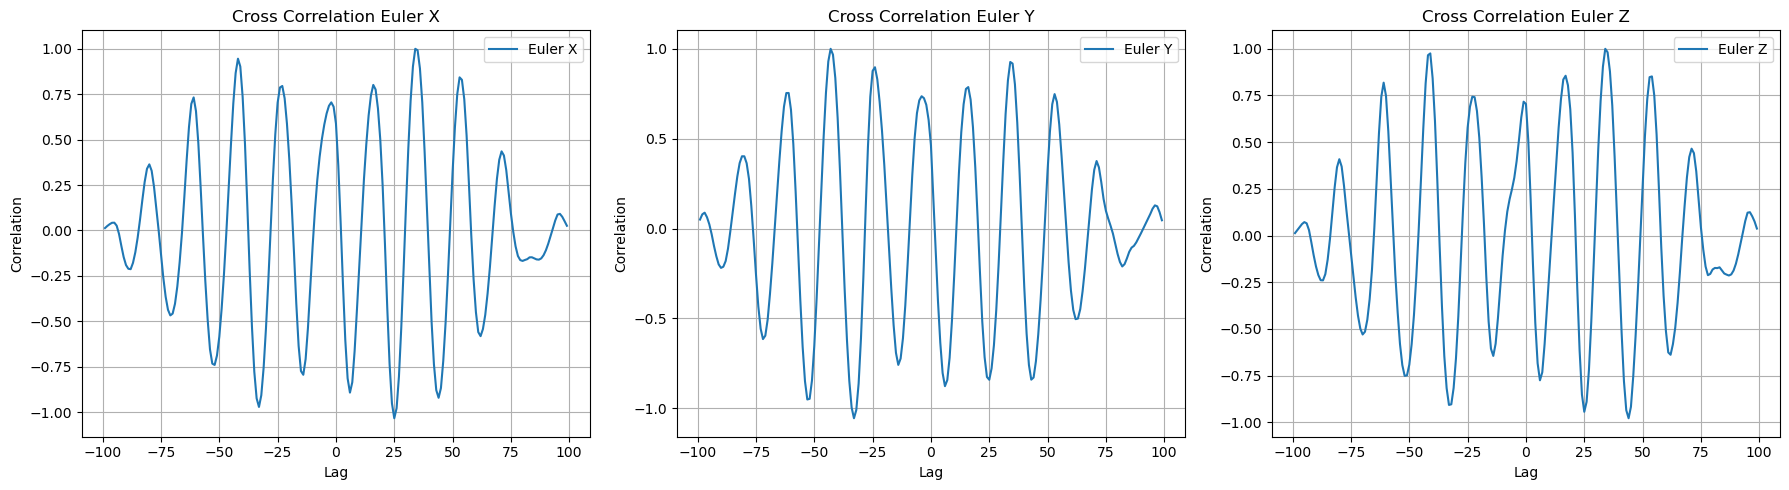

In [216]:
# Calcular la correlación cruzada para Euler X, Y, Z
correlation_results = {}
for i, (curve_goldstand, curve_leydy) in enumerate(zip([average_curve, average_curve_y, average_curve_z], average_curves_leydy)):
    axis = ['X', 'Y', 'Z'][i]
    lags, correlation = cross_correlation(curve_goldstand, curve_leydy)
    correlation_results[axis] = {'lags': lags, 'correlation': correlation}

# Graficar los resultados de la correlación cruzada
plt.figure(figsize=(18, 5))

for i, axis in enumerate(['X', 'Y', 'Z']):
    plt.subplot(1, 3, i+1)
    plt.plot(correlation_results[axis]['lags'], correlation_results[axis]['correlation'], label=f'Euler {axis}')
    plt.title(f'Cross Correlation Euler {axis}')
    plt.xlabel('Lag')
    plt.ylabel('Correlation')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


El análisis de correlación cruzada revela que en los ejes Euler X, Y y Z, existen relaciones entre las señales de GoldStand y Leydy, aunque con variaciones en su fuerza y alineación temporal. En Euler X, se observan picos regulares que sugieren una relación periódica, aunque las señales no están perfectamente alineadas en el tiempo. En Euler Y, la correlación es alta y regular, indicando una buena correlación entre los movimientos en este eje, aunque pueden existir desfases temporales. Por otro lado, en Euler Z, aunque se identifica una correlación periódica, esta es menos pronunciada, señalando una relación menos fuerte en este eje en comparación con los otros.

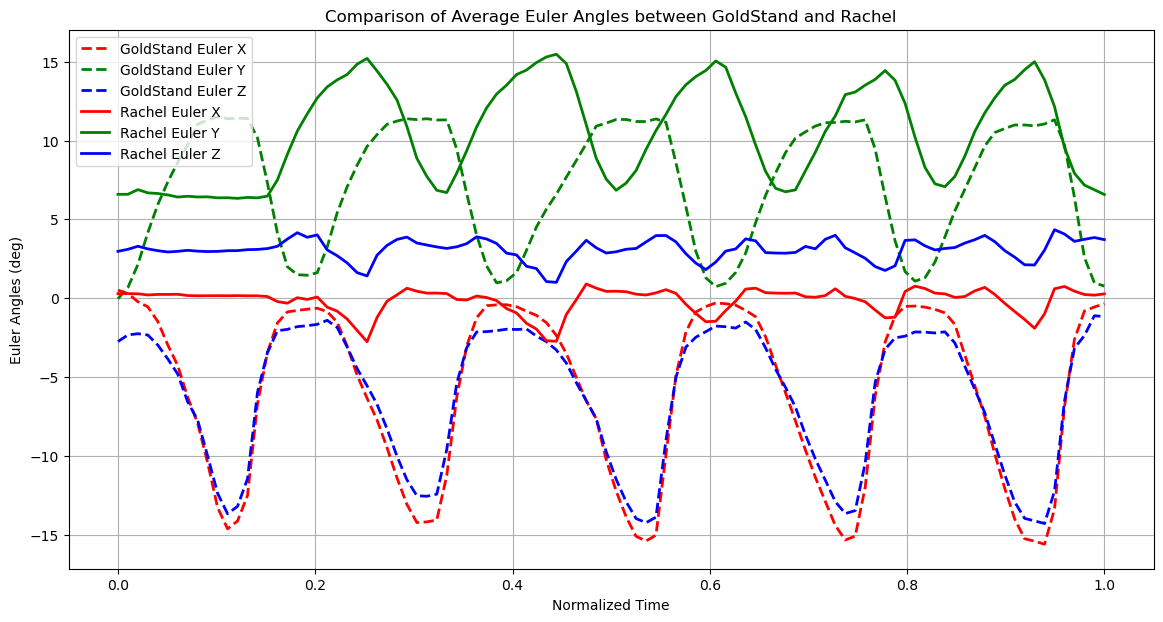

In [217]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

# Load the DataFrame from a specific CSV file located in the 'INERCIAL' directory
rachel_df = pd.read_csv('PRACT3/INERCIAL/Rachel.csv')

# Define a function to find the segmentation points for the Rachel data
def find_segmentation_points(signal):
    peaks, _ = find_peaks(signal, distance=20)
    troughs, _ = find_peaks(-signal, distance=20)
    return sorted(list(peaks) + list(troughs))

# Find segmentation points for Rachel data
segment_points_rachel_x = find_segmentation_points(rachel_df['EulerX (deg)'].values)
segment_points_rachel_y = find_segmentation_points(rachel_df['EulerY (deg)'].values)
segment_points_rachel_z = find_segmentation_points(rachel_df['EulerZ (deg)'].values)

# Since we are looking for 5 curvatures, we select the first 5 segmentation points
segment_points_rachel_x = segment_points_rachel_x[:5]
segment_points_rachel_y = segment_points_rachel_y[:5]
segment_points_rachel_z = segment_points_rachel_z[:5]

# Normalize and average the Euler angles for the Rachel data
def normalize_and_average(df, segment_points):
    euler_angles = ['EulerX (deg)', 'EulerY (deg)', 'EulerZ (deg)']
    average_curves = []
    for angle in euler_angles:
        signal = df[angle].values
        normalized_curves_angle = []
        for i in range(len(segment_points)):
            if i == 0:
                segment_signal = signal[:segment_points[i]]
            else:
                segment_signal = signal[segment_points[i-1]:segment_points[i]]
            time_segment = np.linspace(0, 1, len(segment_signal))
            normalized_signal = normalize_curve(time_segment, segment_signal, target_length)
            normalized_curves_angle.append(normalized_signal)
        if segment_points[-1] != len(signal):
            segment_signal = signal[segment_points[-1]:]
            time_segment = np.linspace(0, 1, len(segment_signal))
            normalized_signal = normalize_curve(time_segment, segment_signal, target_length)
            normalized_curves_angle.append(normalized_signal)
        average_curve = np.mean(normalized_curves_angle, axis=0)
        average_curves.append(average_curve)
    return average_curves

# Calculate the average curves for Rachel data
average_curves_rachel = normalize_and_average(rachel_df, segment_points_rachel_x)

# Now let's plot the average curves for GoldStand and Rachel together for visual comparison
plt.figure(figsize=(14, 7))

# GoldStand curves
plt.plot(np.linspace(0, 1, target_length), average_curve, 'r--', label='GoldStand Euler X', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curve_y, 'g--', label='GoldStand Euler Y', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curve_z, 'b--', label='GoldStand Euler Z', linewidth=2)

# Rachel curves
plt.plot(np.linspace(0, 1, target_length), average_curves_rachel[0], 'r-', label='Rachel Euler X', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curves_rachel[1], 'g-', label='Rachel Euler Y', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curves_rachel[2], 'b-', label='Rachel Euler Z', linewidth=2)

plt.title('Comparison of Average Euler Angles between GoldStand and Rachel')
plt.xlabel('Normalized Time')
plt.ylabel('Euler Angles (deg)')
plt.legend()
plt.grid(True)
plt.show()


La comparación visual entre las curvas promedio de los ángulos de Euler para GoldStand y Rachel revela que Rachel muestra una amplitud de movimiento similar pero con menos variabilidad que GoldStand en Euler X, lo que sugiere mayor consistencia en sus movimientos. En Euler Y, Rachel presenta una media mucho más alta y una variabilidad comparable con GoldStand, indicando una inclinación más pronunciada en este eje. En Euler Z, Rachel tiene una media positiva y una variabilidad mucho menor que GoldStand, lo que refleja una orientación y consistencia de movimiento diferentes. Las estadísticas descriptivas confirman que Rachel tiene movimientos con menor variabilidad en los ejes X y Z, y movimientos más pronunciados en el eje Y en comparación con GoldStand.

In [218]:
# Definir una función para calcular la media y la desviación estándar para las curvas de Euler
def calculate_statistics(average_curves):
    statistics = {}
    for i, axis in enumerate(['X', 'Y', 'Z']):
        statistics[f'Euler{axis} Mean'] = np.mean(average_curves[i])
        statistics[f'Euler{axis} Std'] = np.std(average_curves[i])
    return statistics

# Calcular estadísticas para GoldStand
statistics_goldstand = calculate_statistics([average_curve, average_curve_y, average_curve_z])

# Calcular estadísticas para Leydy
statistics_rachel = calculate_statistics(average_curves_rachel)

statistics_goldstand, statistics_rachel

({'EulerX Mean': -6.0900611337019885,
  'EulerX Std': 5.416844488968032,
  'EulerY Mean': 7.176203195480959,
  'EulerY Std': 3.921573890138153,
  'EulerZ Mean': -6.2106382745132525,
  'EulerZ Std': 4.3654443467804},
 {'EulerX Mean': -0.15825413297542204,
  'EulerX Std': 0.7956610654108786,
  'EulerY Mean': 10.458198065139058,
  'EulerY Std': 3.1224376817148,
  'EulerZ Mean': 3.0828921819080803,
  'EulerZ Std': 0.6685762428053741})

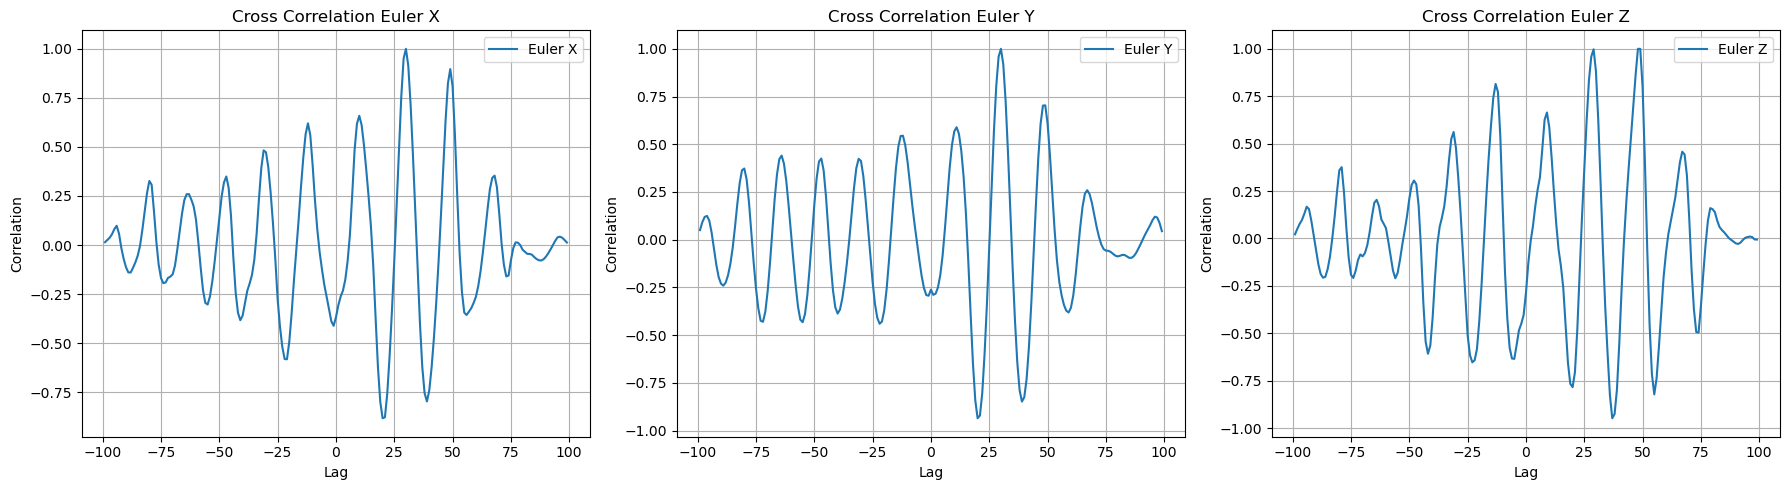

In [219]:
# Calcular la correlación cruzada para Euler X, Y, Z
correlation_results = {}
for i, (curve_goldstand, curve_rachel) in enumerate(zip([average_curve, average_curve_y, average_curve_z], average_curves_rachel)):
    axis = ['X', 'Y', 'Z'][i]
    lags, correlation = cross_correlation(curve_goldstand, curve_rachel)
    correlation_results[axis] = {'lags': lags, 'correlation': correlation}

# Graficar los resultados de la correlación cruzada
plt.figure(figsize=(18, 5))

for i, axis in enumerate(['X', 'Y', 'Z']):
    plt.subplot(1, 3, i+1)
    plt.plot(correlation_results[axis]['lags'], correlation_results[axis]['correlation'], label=f'Euler {axis}')
    plt.title(f'Cross Correlation Euler {axis}')
    plt.xlabel('Lag')
    plt.ylabel('Correlation')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

La correlación cruzada revela la similitud entre las curvas de GoldStand y Rachel en diferentes desplazamientos temporales. En Euler X, hay una correlación variable, indicando diferencias en la sincronización de los movimientos. Euler Y muestra picos de correlación altos, sugiriendo similitudes desplazadas en el tiempo en este eje. En Euler Z, la correlación es menos consistente, reflejando diferencias notables en la orientación y consistencia del eje Z entre Rachel y GoldStand. Aunque las señales comparten similitudes generales, muestran diferencias notables en amplitud, variabilidad y orientación. Rachel presenta movimientos más controlados en el eje Y. La correlación cruzada sugiere similitudes con algunas diferencias significativas en la alineación de las señales.

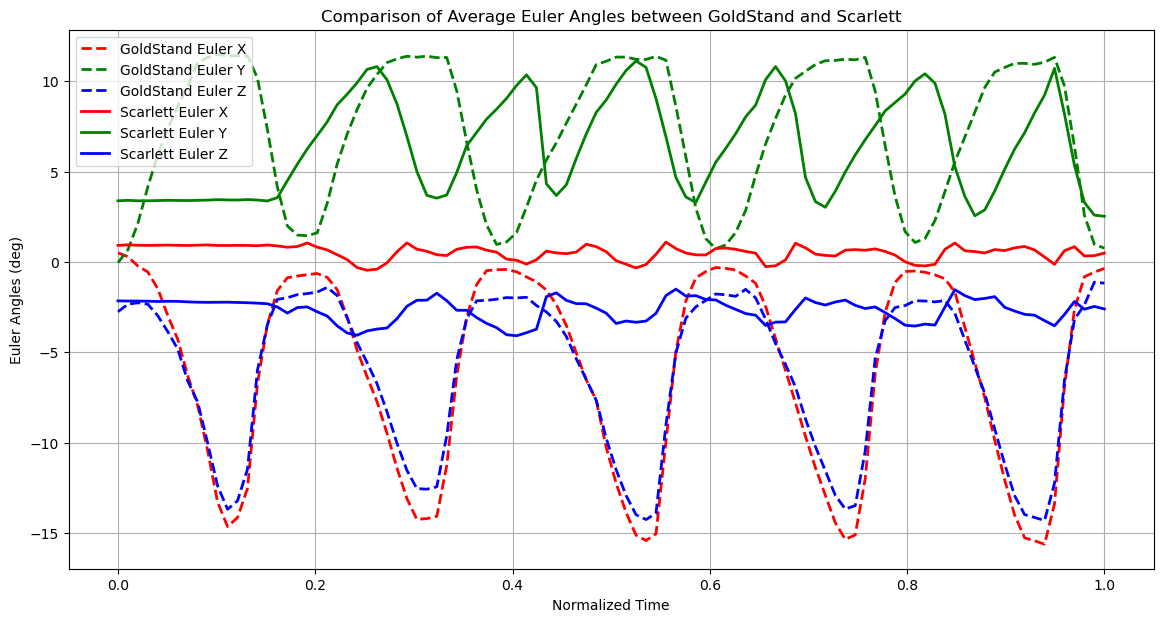

In [220]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

# Load the DataFrame from a specific CSV file located in the 'INERCIAL' directory
scarlett_df = pd.read_csv('PRACT3/INERCIAL/Scarlett.csv')

# Define a function to find the segmentation points for the Scarlett data
def find_segmentation_points(signal):
    peaks, _ = find_peaks(signal, distance=20)
    troughs, _ = find_peaks(-signal, distance=20)
    return sorted(list(peaks) + list(troughs))

# Find segmentation points for Scarlett data
segment_points_scarlett_x = find_segmentation_points(scarlett_df['EulerX (deg)'].values)
segment_points_scarlett_y = find_segmentation_points(scarlett_df['EulerY (deg)'].values)
segment_points_scarlett_z = find_segmentation_points(scarlett_df['EulerZ (deg)'].values)

# Since we are looking for 5 curvatures, we select the first 5 segmentation points
segment_points_scarlett_x = segment_points_scarlett_x[:5]
segment_points_scarlett_y = segment_points_scarlett_y[:5]
segment_points_scarlett_z = segment_points_scarlett_z[:5]

# Normalize and average the Euler angles for the Scarlett data
def normalize_and_average(df, segment_points):
    euler_angles = ['EulerX (deg)', 'EulerY (deg)', 'EulerZ (deg)']
    average_curves = []
    for angle in euler_angles:
        signal = df[angle].values
        normalized_curves_angle = []
        for i in range(len(segment_points)):
            if i == 0:
                segment_signal = signal[:segment_points[i]]
            else:
                segment_signal = signal[segment_points[i-1]:segment_points[i]]
            time_segment = np.linspace(0, 1, len(segment_signal))
            normalized_signal = normalize_curve(time_segment, segment_signal, target_length)
            normalized_curves_angle.append(normalized_signal)
        if segment_points[-1] != len(signal):
            segment_signal = signal[segment_points[-1]:]
            time_segment = np.linspace(0, 1, len(segment_signal))
            normalized_signal = normalize_curve(time_segment, segment_signal, target_length)
            normalized_curves_angle.append(normalized_signal)
        average_curve = np.mean(normalized_curves_angle, axis=0)
        average_curves.append(average_curve)
    return average_curves

# Calculate the average curves for Scarlett data
average_curves_scarlett = normalize_and_average(scarlett_df, segment_points_scarlett_x)

# Now let's plot the average curves for GoldStand and Scarlett together for visual comparison
plt.figure(figsize=(14, 7))

# GoldStand curves
plt.plot(np.linspace(0, 1, target_length), average_curve, 'r--', label='GoldStand Euler X', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curve_y, 'g--', label='GoldStand Euler Y', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curve_z, 'b--', label='GoldStand Euler Z', linewidth=2)

# Scarlett curves
plt.plot(np.linspace(0, 1, target_length), average_curves_scarlett[0], 'r-', label='Scarlett Euler X', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curves_scarlett[1], 'g-', label='Scarlett Euler Y', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curves_scarlett[2], 'b-', label='Scarlett Euler Z', linewidth=2)

plt.title('Comparison of Average Euler Angles between GoldStand and Scarlett')
plt.xlabel('Normalized Time')
plt.ylabel('Euler Angles (deg)')
plt.legend()
plt.grid(True)
plt.show()


La comparación visual entre las curvas de GoldStand y Scarlett revela diferencias significativas en los ángulos de Euler. En Euler X, aunque ambas curvas muestran una amplitud similar, Scarlett presenta una media más cercana a cero, sugiriendo movimientos menos extremos en comparación con GoldStand. En Euler Y, la media ligeramente más baja de Scarlett y una variabilidad comparable indican una inclinación general menos pronunciada en este eje en comparación con GoldStand. Por último, en Euler Z, la señal de Scarlett muestra una media negativa menos extrema que GoldStand, lo que sugiere una orientación diferente en este eje.

In [221]:
# Definir una función para calcular la media y la desviación estándar para las curvas de Euler
def calculate_statistics(average_curves):
    statistics = {}
    for i, axis in enumerate(['X', 'Y', 'Z']):
        statistics[f'Euler{axis} Mean'] = np.mean(average_curves[i])
        statistics[f'Euler{axis} Std'] = np.std(average_curves[i])
    return statistics

# Calcular estadísticas para GoldStand
statistics_goldstand = calculate_statistics([average_curve, average_curve_y, average_curve_z])

# Calcular estadísticas para Leydy
statistics_scarlett = calculate_statistics(average_curves_scarlett)

statistics_goldstand, statistics_scarlett

({'EulerX Mean': -6.0900611337019885,
  'EulerX Std': 5.416844488968032,
  'EulerY Mean': 7.176203195480959,
  'EulerY Std': 3.921573890138153,
  'EulerZ Mean': -6.2106382745132525,
  'EulerZ Std': 4.3654443467804},
 {'EulerX Mean': 0.5311986016934338,
  'EulerX Std': 0.39034812204350555,
  'EulerY Mean': 6.372164215110774,
  'EulerY Std': 2.685583451063987,
  'EulerZ Mean': -2.6653297687831645,
  'EulerZ Std': 0.6331190039389091})

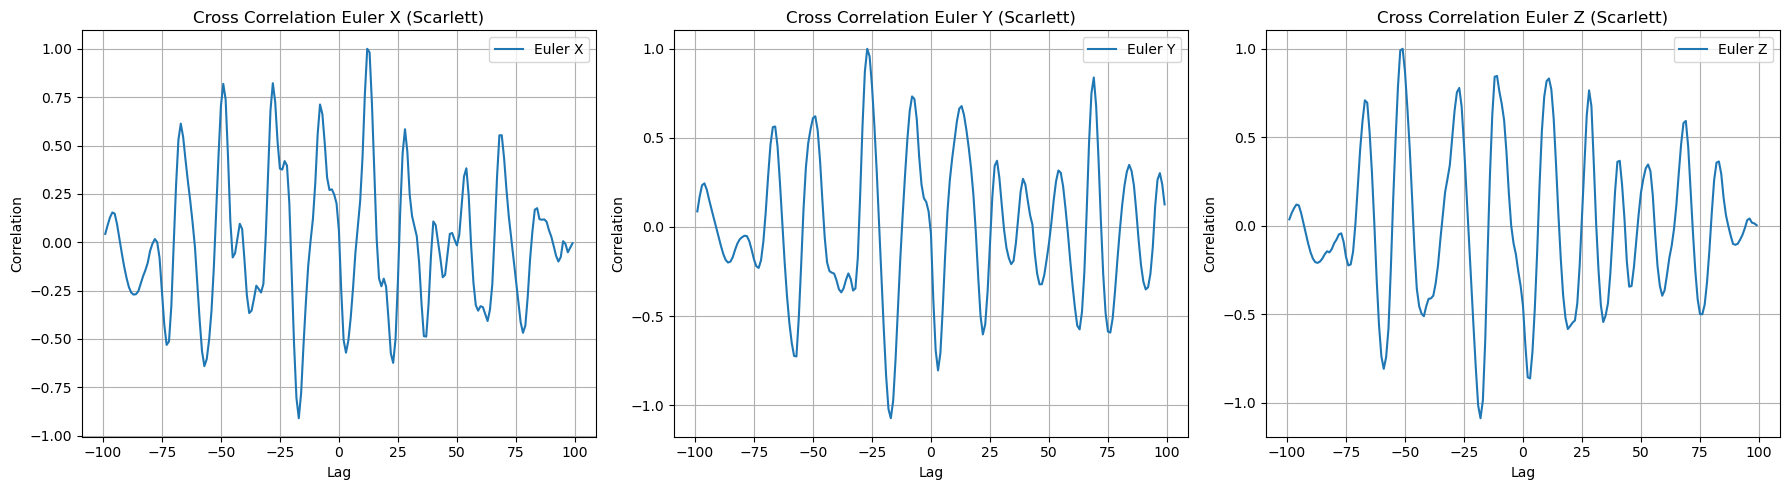

In [222]:
# Calcular la correlación cruzada para Euler X, Y, Z utilizando los datos de Scarlett
correlation_results_scarlett = {}  # Variable para almacenar los resultados de la correlación cruzada de Scarlett

for i, (curve_goldstand, curve_scarlett) in enumerate(zip([average_curve, average_curve_y, average_curve_z], average_curves_scarlett)):
    axis = ['X', 'Y', 'Z'][i]
    lags, correlation = cross_correlation(curve_scarlett, curve_goldstand)  # Intercambia las curvas para calcular la correlación cruzada con Scarlett
    correlation_results_scarlett[axis] = {'lags': lags, 'correlation': correlation}

# Graficar los resultados de la correlación cruzada para Scarlett
plt.figure(figsize=(18, 5))

for i, axis in enumerate(['X', 'Y', 'Z']):
    plt.subplot(1, 3, i+1)
    plt.plot(correlation_results_scarlett[axis]['lags'], correlation_results_scarlett[axis]['correlation'], label=f'Euler {axis}')
    plt.title(f'Cross Correlation Euler {axis} (Scarlett)')
    plt.xlabel('Lag')
    plt.ylabel('Correlation')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

Comparado con GoldStand, las curvas de Scarlett muestran movimientos con menos variabilidad y amplitud en los ejes X y Z, y una ligera disminución en la amplitud de movimientos en el eje Y. En cuanto a la correlación cruzada, en Euler X se observa una variabilidad considerable, lo que indica diferencias en la sincronización o la dirección de los movimientos entre los conjuntos de datos. Euler Y muestra picos de correlación, sugiriendo similitudes en los movimientos que podrían estar desplazados en el tiempo, mientras que en Euler Z la correlación es menos consistente, reflejando diferencias en la orientación y consistencia del movimiento.

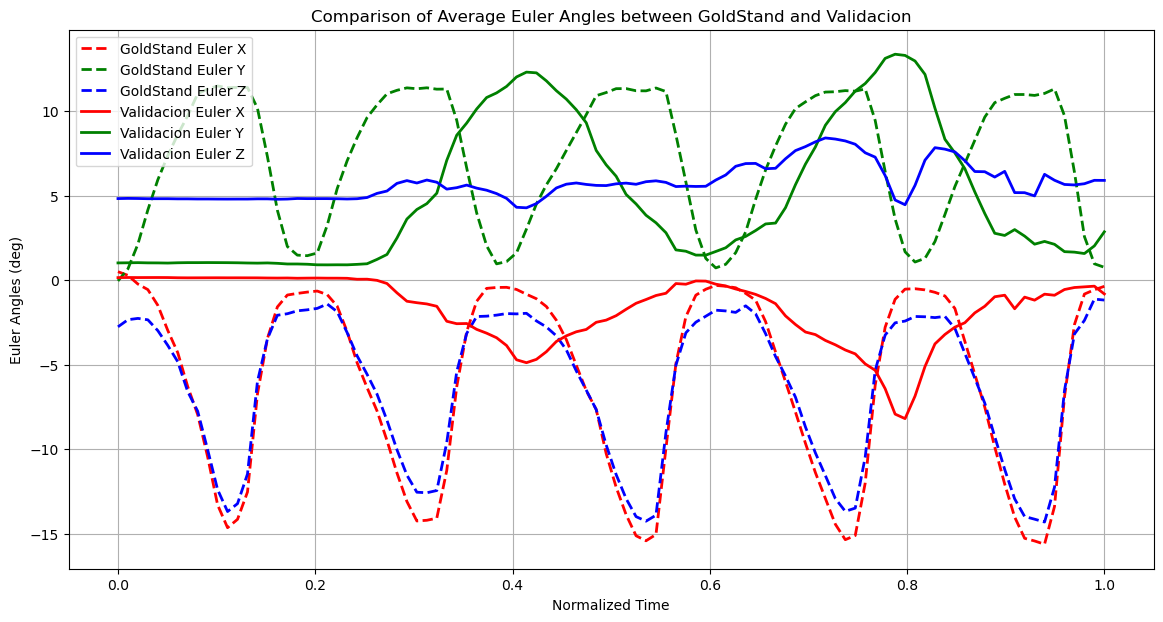

In [223]:
# Load the DataFrame from a specific CSV file located in the 'INERCIAL' directory
validacion_df = pd.read_csv('PRACT3/INERCIAL/Validacion.csv')

# Define a function to find the segmentation points for the Validacion data
def find_segmentation_points(signal):
    peaks, _ = find_peaks(signal, distance=20)
    troughs, _ = find_peaks(-signal, distance=20)
    return sorted(list(peaks) + list(troughs))

# Find segmentation points for Validacion data
segment_points_validacion_x = find_segmentation_points(validacion_df[' EulerX (deg)'].values)
segment_points_validacion_y = find_segmentation_points(validacion_df[' EulerY (deg)'].values)
segment_points_validacion_z = find_segmentation_points(validacion_df[' EulerZ (deg)'].values)

# Since we are looking for 5 curvatures, we select the first 5 segmentation points
segment_points_validacion_x = segment_points_validacion_x[:5]
segment_points_validacion_y = segment_points_validacion_y[:5]
segment_points_validacion_z = segment_points_validacion_z[:5]

# Normalize and average the Euler angles for the Validacion data
def normalize_and_average(df, segment_points):
    euler_angles = [' EulerX (deg)', ' EulerY (deg)', ' EulerZ (deg)']
    average_curves = []
    for angle in euler_angles:
        signal = df[angle].values
        normalized_curves_angle = []
        for i in range(len(segment_points)):
            if i == 0:
                segment_signal = signal[:segment_points[i]]
            else:
                segment_signal = signal[segment_points[i-1]:segment_points[i]]
            time_segment = np.linspace(0, 1, len(segment_signal))
            normalized_signal = normalize_curve(time_segment, segment_signal, target_length)
            normalized_curves_angle.append(normalized_signal)
        if segment_points[-1] != len(signal):
            segment_signal = signal[segment_points[-1]:]
            time_segment = np.linspace(0, 1, len(segment_signal))
            normalized_signal = normalize_curve(time_segment, segment_signal, target_length)
            normalized_curves_angle.append(normalized_signal)
        average_curve = np.mean(normalized_curves_angle, axis=0)
        average_curves.append(average_curve)
    return average_curves

# Calculate the average curves for Validacion data
average_curves_validacion = normalize_and_average(validacion_df, segment_points_validacion_x)

# Now let's plot the average curves for GoldStand and Validacion together for visual comparison
plt.figure(figsize=(14, 7))

# GoldStand curves
plt.plot(np.linspace(0, 1, target_length), average_curve, 'r--', label='GoldStand Euler X', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curve_y, 'g--', label='GoldStand Euler Y', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curve_z, 'b--', label='GoldStand Euler Z', linewidth=2)

# Validacion curves
plt.plot(np.linspace(0, 1, target_length), average_curves_validacion[0], 'r-', label='Validacion Euler X', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curves_validacion[1], 'g-', label='Validacion Euler Y', linewidth=2)
plt.plot(np.linspace(0, 1, target_length), average_curves_validacion[2], 'b-', label='Validacion Euler Z', linewidth=2)

plt.title('Comparison of Average Euler Angles between GoldStand and Validacion')
plt.xlabel('Normalized Time')
plt.ylabel('Euler Angles (deg)')
plt.legend()
plt.grid(True)
plt.show()


La comparación visual entre las curvas promedio de los ángulos de Euler de GoldStand y los datos de validación muestra diferencias notables. Los datos de validación exhiben una menor amplitud y una media más cercana a cero en el eje X, indicando movimientos menos extremos en comparación con GoldStand. En el eje Y, la media es más baja en los datos de validación, sugiriendo una inclinación menos pronunciada. Sin embargo, en el eje Z, los datos de validación muestran una orientación completamente diferente, con una media positiva en contraste con la media negativa de GoldStand. Las estadísticas confirman estas observaciones, destacando una menor variabilidad en los ejes X y Z para los datos de validación y una orientación divergente en el eje Z en comparación con GoldStand, aunque la variabilidad en el eje Y es similar entre ambos conjuntos de datos.

In [224]:
# Definir una función para calcular la media y la desviación estándar para las curvas de Euler
def calculate_statistics(average_curves):
    statistics = {}
    for i, axis in enumerate(['X', 'Y', 'Z']):
        statistics[f'Euler{axis} Mean'] = np.mean(average_curves[i])
        statistics[f'Euler{axis} Std'] = np.std(average_curves[i])
    return statistics

# Calcular estadísticas para GoldStand
statistics_goldstand = calculate_statistics([average_curve, average_curve_y, average_curve_z])

# Calcular estadísticas 
statistics_validacion = calculate_statistics(average_curves_validacion)

statistics_goldstand, statistics_validacion


({'EulerX Mean': -6.0900611337019885,
  'EulerX Std': 5.416844488968032,
  'EulerY Mean': 7.176203195480959,
  'EulerY Std': 3.921573890138153,
  'EulerZ Mean': -6.2106382745132525,
  'EulerZ Std': 4.3654443467804},
 {'EulerX Mean': -1.7073606801350159,
  'EulerX Std': 1.9535485386956726,
  'EulerY Mean': 4.957170835911953,
  'EulerY Std': 4.162566838158908,
  'EulerZ Mean': 5.758520162579296,
  'EulerZ Std': 1.0269441169147013})

In [225]:
def cross_correlation(x, y):
    """
    Compute the cross-correlation between two signals.
    
    Parameters:
        x (array-like): First signal.
        y (array-like): Second signal.
        
    Returns:
        lags (array): Array of lags.
        correlation (array): Cross-correlation values.
    """
    # Compute the length of the signals
    n = len(x)
    m = len(y)
    
    # Compute the cross-correlation
    correlation = np.correlate(x, y, mode='full') / (np.std(x) * np.std(y) * n)
    
    # Compute the lags
    lags = np.arange(-m + 1, n)
    
    return lags, correlation


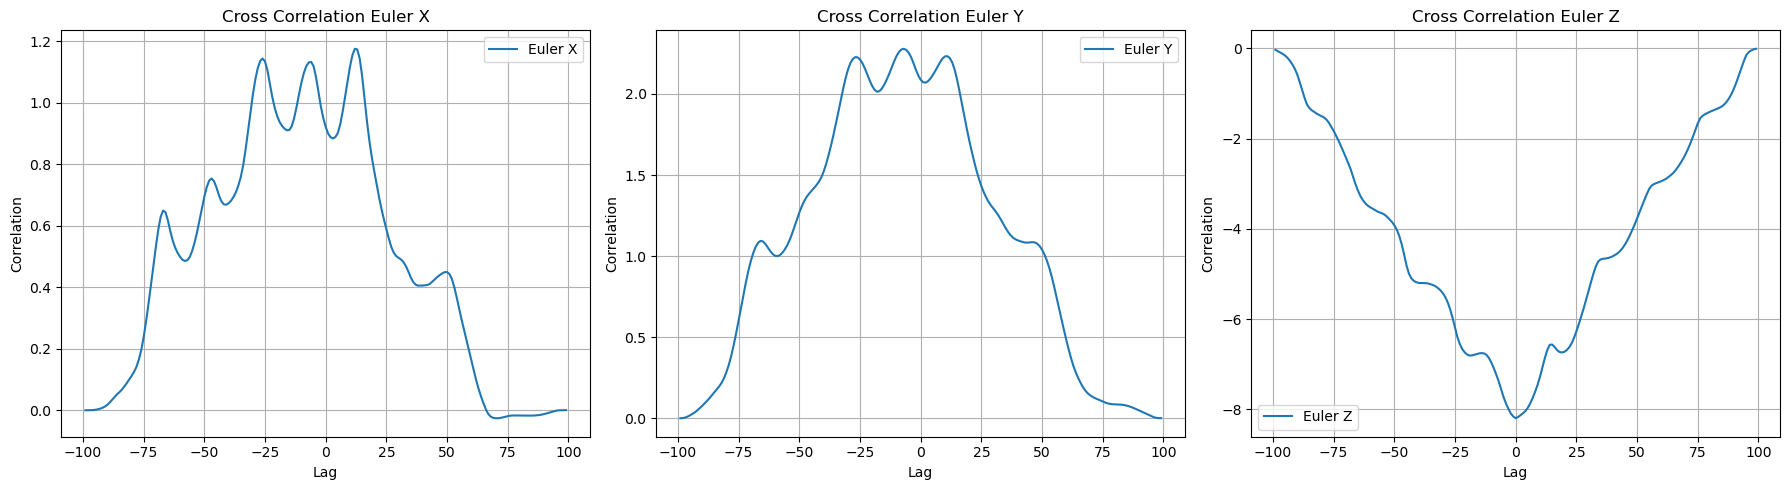

In [226]:
# Calcular la correlación cruzada para Euler X, Y, Z
correlation_results = {}
for i, (curve_goldstand, curve_validacion) in enumerate(zip([average_curve, average_curve_y, average_curve_z], average_curves_validacion)):
    axis = ['X', 'Y', 'Z'][i]
    lags, correlation = cross_correlation(curve_goldstand, curve_validacion)
    correlation_results[axis] = {'lags': lags, 'correlation': correlation}

# Graficar los resultados de la correlación cruzada
plt.figure(figsize=(18, 5))

for i, axis in enumerate(['X', 'Y', 'Z']):
    plt.subplot(1, 3, i+1)
    plt.plot(correlation_results[axis]['lags'], correlation_results[axis]['correlation'], label=f'Euler {axis}')
    plt.title(f'Cross Correlation Euler {axis}')
    plt.xlabel('Lag')
    plt.ylabel('Correlation')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

Los datos de validación muestran movimientos menos extremos y más controlados en los ejes X y Z, y una orientación completamente diferente en el eje Z en comparación con GoldStand. Aunque hay similitudes en la forma de las curvas en algunos puntos, las diferencias en la alineación temporal y la orientación de los movimientos son notables.

<center>
<div style="color:;
           display:fill;
           border-radius:2px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.6px">

<h2 style="padding: 30px;
              color:snow;">  DTW (Dynamic Time Warping)
</h2>
</div>

DTW es una técnica que permite comparar dos secuencias temporales que pueden tener diferentes longitudes y velocidades de muestreo, alineando óptimamente los puntos correspondientes en las dos secuencias para minimizar la diferencia entre ellas.

In [128]:
# Asegúrate de que estás usando el nombre de la columna exactamente como se muestra
signal = goldstand_df['EulerX (deg)'].values

In [124]:
# Corrige los nombres de las columnas eliminando espacios al principio y al final
goldstand_df.columns = [col.strip() for col in goldstand_df.columns]

<center>
<div style="color:;
           display:fill;
           border-radius:2px;
           background-color: ;
           font-size:80%;
           letter-spacing:0.2px">

<h2 style="padding: 30px;
              color:snow;">  DTW GoldStand entre Validación
</h2>
</div>

In [139]:
def calculate_dtw_distance(curves_1, curves_2):
    dtw_distances = {}
    for i, axis in enumerate(['X', 'Y', 'Z']):
        # Asegurarse de que las curvas sean unidimensionales y listas
        curve_1 = list(np.array(curves_1[i]).flatten())
        curve_2 = list(np.array(curves_2[i]).flatten())
        
        print(f"Debug: Curve 1 type: {type(curve_1)}, Curve 2 type: {type(curve_2)}")  # Debugging
        
        # Calcular la distancia DTW entre las dos curvas
        distance, _ = fastdtw(curve_1, curve_2)
        
        # Almacenar la distancia DTW en el diccionario con la etiqueta del eje correspondiente
        dtw_distances[f'Euler{axis} DTW Distance'] = distance
    return dtw_distances

# Calcular las distancias DTW para las curvas de Euler X, Y, Z entre GoldStand y Validación
dtw_distances = calculate_dtw_distance([average_curve, average_curve_y, average_curve_z], average_curves_validacion)

# Imprimir las distancias DTW calculadas
for axis, distance in dtw_distances.items():
    print(f"{axis}: {distance}")


Debug: Curve 1 type: <class 'list'>, Curve 2 type: <class 'list'>
Debug: Curve 1 type: <class 'list'>, Curve 2 type: <class 'list'>
Debug: Curve 1 type: <class 'list'>, Curve 2 type: <class 'list'>
EulerX DTW Distance: 394.2137018105952
EulerY DTW Distance: 246.88107680524567
EulerZ DTW Distance: 1196.9158437092544


Estos resultados muestran las diferencias cuantitativas entre las curvas de Euler de los dos conjuntos de datos. Una distancia DTW más alta indica una mayor diferencia o disimilitud entre las curvas. Por lo tanto, en este caso, las curvas de Euler Z tienen la mayor diferencia entre los dos conjuntos de datos, seguidas de Euler X y luego Euler Y.

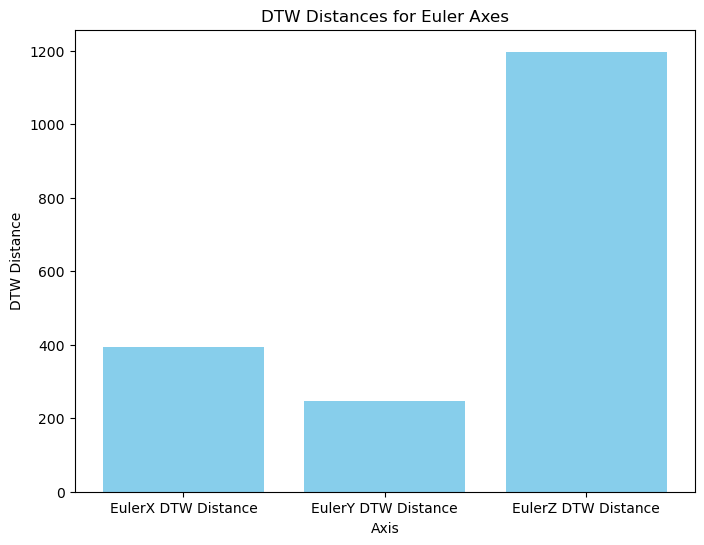

In [136]:
import matplotlib.pyplot as plt

# Extract the axes and distances
axes = list(dtw_distances.keys())
distances = list(dtw_distances.values())

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(axes, distances, color='skyblue')
plt.title('DTW Distances for Euler Axes')
plt.xlabel('Axis')
plt.ylabel('DTW Distance')
plt.show()


<center>
<div style="color:;
           display:fill;
           border-radius:2px;
           background-color: ;
           font-size:80%;
           letter-spacing:0.2px">

<h2 style="padding: 30px;
              color:snow;">  DTW GoldStand entre CSV de individuos
</h2>
</div>

In [155]:
def calculate_dtw_distance(curves_1, curves_2):
    dtw_distances = {}
    for i, axis in enumerate(['X', 'Y', 'Z']):
        # Asegurarse de que las curvas sean unidimensionales y listas
        curve_1 = list(np.array(curves_1[i]).flatten())
        curve_2 = list(np.array(curves_2[i]).flatten())
        
        #print(f"Debug: Curve 1 type: {type(curve_1)}, Curve 2 type: {type(curve_2)}")  # Debugging
        
        # Calcular la distancia DTW entre las dos curvas
        distance, _ = fastdtw(curve_1, curve_2)
        
        # Almacenar la distancia DTW en el diccionario con la etiqueta del eje correspondiente
        dtw_distances[f'Euler{axis} DTW Distance'] = distance
    return dtw_distances

# Calcular las distancias DTW para las curvas de Euler X, Y, Z 
dtw_distances = calculate_dtw_distance([average_curve, average_curve_y, average_curve_z], average_curves_andrea)

# Imprimir las distancias DTW calculadas
for axis, distance in dtw_distances.items():
    print(f"{axis}: {distance}")

EulerX DTW Distance: 362.55388208641125
EulerY DTW Distance: 200.03425819735506
EulerZ DTW Distance: 460.54207997243014


In [156]:
# Calcular las distancias DTW para las curvas de Euler X, Y, Z 
dtw_distances = calculate_dtw_distance([average_curve, average_curve_y, average_curve_z], average_curves_andres)

# Imprimir las distancias DTW calculadas
for axis, distance in dtw_distances.items():
    print(f"{axis}: {distance}")

EulerX DTW Distance: 203.6664944873549
EulerY DTW Distance: 68.32937274357448
EulerZ DTW Distance: 1951.9743469332952


In [157]:
# Calcular las distancias DTW para las curvas de Euler X, Y, Z 
dtw_distances = calculate_dtw_distance([average_curve, average_curve_y, average_curve_z], average_curves_ariana)

# Imprimir las distancias DTW calculadas
for axis, distance in dtw_distances.items():
    print(f"{axis}: {distance}")

EulerX DTW Distance: 259.36785386619215
EulerY DTW Distance: 230.6876349766828
EulerZ DTW Distance: 796.5531545294399


In [158]:
# Calcular las distancias DTW para las curvas de Euler X, Y, Z 
dtw_distances = calculate_dtw_distance([average_curve, average_curve_y, average_curve_z], average_curves_arturo)

# Imprimir las distancias DTW calculadas
for axis, distance in dtw_distances.items():
    print(f"{axis}: {distance}")

EulerX DTW Distance: 604.6589911647648
EulerY DTW Distance: 133.2299859590662
EulerZ DTW Distance: 690.3308342404673


In [159]:
# Calcular las distancias DTW para las curvas de Euler X, Y, Z 
dtw_distances = calculate_dtw_distance([average_curve, average_curve_y, average_curve_z], average_curves_cristian)

# Imprimir las distancias DTW calculadas
for axis, distance in dtw_distances.items():
    print(f"{axis}: {distance}")

EulerX DTW Distance: 336.2996564987988
EulerY DTW Distance: 168.3523542044981
EulerZ DTW Distance: 1034.8782978686147


In [163]:
# Calcular las distancias DTW para las curvas de Euler X, Y, Z 
dtw_distances = calculate_dtw_distance([average_curve, average_curve_y, average_curve_z], average_curves_jonathan)

# Imprimir las distancias DTW calculadas
for axis, distance in dtw_distances.items():
    print(f"{axis}: {distance}")

EulerX DTW Distance: 189.40575014253352
EulerY DTW Distance: 98.39199822461099
EulerZ DTW Distance: 518.4024149012756


In [164]:
# Calcular las distancias DTW para las curvas de Euler X, Y, Z 
dtw_distances = calculate_dtw_distance([average_curve, average_curve_y, average_curve_z], average_curves_juan)

# Imprimir las distancias DTW calculadas
for axis, distance in dtw_distances.items():
    print(f"{axis}: {distance}")

EulerX DTW Distance: 499.5948894477311
EulerY DTW Distance: 479.9916452798024
EulerZ DTW Distance: 1487.6612903454673


In [228]:
# Calcular las distancias DTW para las curvas de Euler X, Y, Z 
dtw_distances = calculate_dtw_distance([average_curve, average_curve_y, average_curve_z], average_curves_leydy)

# Imprimir las distancias DTW calculadas
for axis, distance in dtw_distances.items():
    print(f"{axis}: {distance}")

EulerX DTW Distance: 242.91118368178527
EulerY DTW Distance: 42.722699417871155
EulerZ DTW Distance: 134.5549356383208


In [165]:
dtw_distances = calculate_dtw_distance([average_curve, average_curve_y, average_curve_z], average_curves_rachel)
# Imprimir las distancias DTW calculadas
for axis, distance in dtw_distances.items():
    print(f"{axis}: {distance}")

EulerX DTW Distance: 504.2163489665354
EulerY DTW Distance: 326.56060784136173
EulerZ DTW Distance: 929.353045642133


In [227]:
dtw_distances = calculate_dtw_distance([average_curve, average_curve_y, average_curve_z], average_curves_scarlett)
# Imprimir las distancias DTW calculadas
for axis, distance in dtw_distances.items():
    print(f"{axis}: {distance}")

EulerX DTW Distance: 639.8861624859059
EulerY DTW Distance: 128.36851799149238
EulerZ DTW Distance: 351.5886982739969


<center>
<div style="color:;
           display:fill;
           border-radius:2px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.6px">

<h2 style="padding: 30px;
              color:snow;">  Calificación general
</h2>
</div>

Este código se encarga de comparar las métricas de GoldStand con las de otros conjuntos de datos, como Andrea, Andres, Ariana, etc. Para cada conjunto de datos, se calcula una calificación para las diferencias en las métricas de EulerX Mean, EulerX Std, EulerY Mean, EulerY Std, EulerZ Mean y EulerZ Std, en comparación con GoldStand. Se establecen umbrales para cada métrica y eje, y se asignan calificaciones ('Bien', 'Bueno' o 'No tan bueno') en función de cuán cerca estén los valores de las métricas de los umbrales establecidos. Además, se calcula una calificación general basada en el promedio de las calificaciones de cada eje. Finalmente, se crea un DataFrame con las calificaciones y se guarda en un archivo CSV llamado "ratings_comparison.csv".

In [267]:
import pandas as pd

metrics_goldstand = {
    'EulerX Mean': -6.09, 'EulerX Std': 5.41, 'EulerX DTW': None,
    'EulerY Mean': 7.17, 'EulerY Std': 3.92, 'EulerY DTW': None,
    'EulerZ Mean': -6.21, 'EulerZ Std': 4.36, 'EulerZ DTW': None
}

metrics_other_datasets = {
    'Andrea': {'EulerX Mean': -1.84, 'EulerX Std': 2.03, 'EulerX DTW': 362.55,
               'EulerY Mean': 4.45, 'EulerY Std': 3.61, 'EulerY DTW': 200.03,
               'EulerZ Mean': -0.96, 'EulerZ Std': 1.38, 'EulerZ DTW': 460.54},
    'Andres': {'EulerX Mean': -1.95, 'EulerX Std': 2.60, 'EulerX DTW': 203.66,
                 'EulerY Mean': 6.85, 'EulerY Std': 4.05, 'EulerY DTW': 68.32,
                 'EulerZ Mean': 13.30, 'EulerZ Std': 2.09, 'EulerZ DTW': 1951.97},
    'Ariana': {'EulerX Mean': -5.50, 'EulerX Std': 2.81, 'EulerX DTW': 259.36,
                 'EulerY Mean': 4.00, 'EulerY Std': 3.31, 'EulerY DTW': 230.68,
                 'EulerZ Mean': 1.78, 'EulerZ Std': 1.82, 'EulerZ DTW': 796.55},
    'Arturo': {'EulerX Mean': 0.72, 'EulerX Std': 0.82, 'EulerX DTW': 604.65,
                 'EulerY Mean': 5.39, 'EulerY Std': 4.42, 'EulerY DTW': 133,
                 'EulerZ Mean': -14.12, 'EulerZ Std': 1.89, 'EulerZ DTW': 690},
    'Cristian': {'EulerX Mean': -3.13, 'EulerX Std': 1.36, 'EulerX DTW': 336.29,
                 'EulerY Mean': 7.94, 'EulerY Std': 3.55, 'EulerY DTW': 168.35,
                 'EulerZ Mean': 4.13, 'EulerZ Std': 1.52, 'EulerZ DTW': 1034.87},
    'Jonathan': {'EulerX Mean': -1.56, 'EulerX Std': 4.69, 'EulerX DTW': 189.40,
                 'EulerY Mean': 7.46, 'EulerY Std': 4.85, 'EulerY DTW': 98.39,
                 'EulerZ Mean': 0.50, 'EulerZ Std': 4.65, 'EulerZ DTW': 518.40},
    'Juan': {'EulerX Mean': -0.74, 'EulerX Std': 1.23, 'EulerX DTW': 499.59,
                 'EulerY Mean': 0.64, 'EulerY Std': 3.28, 'EulerY DTW': 479.99,
                 'EulerZ Mean': 8.66, 'EulerZ Std': 1.03, 'EulerZ DTW': 1487.66},
    'Leydy': {'EulerX Mean': -3.45, 'EulerX Std': 3.32, 'EulerX DTW': 242.92,
                 'EulerY Mean': 5.79, 'EulerY Std': 4.10, 'EulerY DTW': 42.72,
                 'EulerZ Mean': -4.52, 'EulerZ Std': 2.58, 'EulerZ DTW': 134.55},
    'Rachel': {'EulerX Mean': -0.15, 'EulerX Std': 0.79, 'EulerX DTW': 504,
                 'EulerY Mean': 10.45, 'EulerY Std': 3.12, 'EulerY DTW': 326.56,
                 'EulerZ Mean': 3.08, 'EulerZ Std': 0.66, 'EulerZ DTW': 929.35},
    'Scarlett': {'EulerX Mean': 0.53, 'EulerX Std': 0.39, 'EulerX DTW': 639.88,
                 'EulerY Mean': 6.37, 'EulerY Std': 2.68, 'EulerY DTW': 128.36,
                 'EulerZ Mean': -2.66, 'EulerZ Std': 0.63, 'EulerZ DTW': 351.58},
    'Validacion': {'EulerX Mean': -1.70, 'EulerX Std': 1.95, 'EulerX DTW': 394.21,
                 'EulerY Mean': 4.95, 'EulerY Std': 4.16, 'EulerY DTW': 246.88,
                 'EulerZ Mean': 5.75, 'EulerZ Std': 1.02, 'EulerZ DTW': 1196.91},
}
# Definir umbrales para cada eje
thresholds = {
    'Mean': {'X': 2, 'Y': 2, 'Z': 2},
    'Std': {'X': 1, 'Y': 1, 'Z': 1},
    'DTW': {'X': 150, 'Y': 150, 'Z': 150}
}

# Función para calificar la diferencia para una métrica
def rate_difference(gs_value, dataset_value, threshold):
    if dataset_value is None:  # Si no hay valor de DTW, no se puede calificar
        return None
    diff = abs(gs_value - dataset_value)
    if diff < threshold * 0.5:
        return 'Bien'
    elif diff < threshold:
        return 'Bueno'
    else:
        return 'No tan bueno'

# Función para calcular calificaciones para un conjunto de datos
def calculate_ratings(metrics_gs, metrics_dataset):
    ratings = {}
    for axis in ['X', 'Y', 'Z']:
        for metric in ['Mean', 'Std']:
            gs_value = metrics_gs[f'Euler{axis} {metric}']
            dataset_value = metrics_dataset.get(f'Euler{axis} {metric}', None)
            threshold = thresholds[metric][axis]
            rating = rate_difference(gs_value, dataset_value, threshold) if gs_value is not None else None
            ratings[f'Euler{axis} {metric} Rating'] = rating
    # Calcular la calificación general como el promedio de las calificaciones
    axis_ratings = [ratings[f'Euler{axis} {metric} Rating'] for axis in ['X', 'Y', 'Z'] for metric in ['Mean', 'Std'] if ratings[f'Euler{axis} {metric} Rating'] is not None]
    if axis_ratings:
        overall_rating = 'Bien' if axis_ratings.count('Bien') >= 2 else 'No tan bueno'
    else:
        overall_rating = None
    ratings['Overall Rating'] = overall_rating
    return ratings

# Crear un DataFrame para las calificaciones
columns = ['Dataset', 'EulerX Mean', 'EulerX Std', 'EulerX DTW',
           'EulerY Mean', 'EulerY Std', 'EulerY DTW',
           'EulerZ Mean', 'EulerZ Std', 'EulerZ DTW',
           'Overall Rating']

# Crear una lista para almacenar los DataFrames
dfs = []

# Rellenar la lista con los DataFrames de cada conjunto de datos
for dataset_name, metrics in metrics_other_datasets.items():
    ratings = calculate_ratings(metrics_goldstand, metrics)
    new_row = {**{'Dataset': dataset_name}, **metrics, **ratings}
    dfs.append(pd.DataFrame([new_row]))

# Concatenar todos los DataFrames en uno solo
ratings_df = pd.concat(dfs, ignore_index=True)

# Guardar el DataFrame en un archivo CSV
try:
    csv_file_path = 'PRACT3/ratings_comparison.csv'
    ratings_df.to_csv(csv_file_path, index=False)
except Exception as e:
    error_message = f"An error occurred: {e}"
    print(error_message)
    csv_file_path = ""  # Reset the path if an error occurred

csv_file_path  # Retornar la ruta del archivo para su descarga


'PRACT3/ratings_comparison.csv'

<center>
<div style="color:;
           display:fill;
           border-radius:2px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.6px">

<h2 style="padding: 30px;
              color:snow;">  Conclusión
</h2>
</div>

Para la práctica de Inercial que involucró el uso de IMU (Unidades de Medición Inercial), se llevó a cabo un estudio detallado de movimientos corporales utilizando mediciones inerciales durante la ejecución de cinco sentadillas dentro de un periodo de tiempo específico. El objetivo principal fue evaluar y comparar el rendimiento de diferentes conjuntos de datos recopilados durante estas acciones con respecto a un estándar de referencia establecido, denominado GoldStand.

Se emplearon diversas métricas para caracterizar los movimientos, centrándose principalmente en las curvas promedio de los ángulos de Euler en los ejes X, Y y Z. Estos ángulos proporcionan información crucial sobre la orientación y la inclinación del cuerpo durante el movimiento. Los conjuntos de datos comparados incluyeron mediciones de diferentes individuos, como Andrea, Andres, Ariana, entre otros.

Durante el análisis comparativo, se observaron diferencias notables en términos de amplitud, variabilidad y orientación de los movimientos entre los diferentes conjuntos de datos y GoldStand. Estas diferencias se destacaron especialmente en los ejes X, Y y Z, lo que sugiere variaciones significativas en la ejecución de las sentadillas entre los participantes.

Además de la comparación visual de las curvas promedio de los ángulos de Euler, se utilizó la distancia DTW (Dynamic Time Warping) para evaluar la similitud temporal entre las señales. Esta medida permitió analizar la correspondencia temporal entre los movimientos registrados, incluso cuando las señales tenían diferencias en la velocidad, la escala temporal o pequeños desplazamientos.

Para proporcionar una evaluación más cuantitativa de las diferencias entre los conjuntos de datos y GoldStand, se calcularon calificaciones utilizando umbrales predefinidos para las métricas de los ángulos de Euler. Estas calificaciones se basaron en la diferencia entre los valores de las métricas y se asignaron etiquetas de "Bien", "Bueno" o "No tan bueno", según la magnitud de la diferencia respecto al umbral establecido.

Durante el análisis, se observó una similitud inicial en los datos recopilados de los individuos Jonathan, Leydy y Andres, lo que se reflejó en una clasificación adecuada según el overall rating, indicando una proximidad al estándar GoldStand. Sin embargo, Leydy fue descartado debido a diferencias más significativas en comparación con GoldStand, mientras que Andres y Jonathan permanecieron en el análisis. Por otro lado, los datos de Validación no mostraron similitud alguna con el estándar desde el inicio y fueron clasificados como "no tan bueno", lo que sugiere una discrepancia considerable en los movimientos registrados. Este análisis proporciona una excelente herramienta para calificar y evaluar los movimientos durante un ejercicio específico, ofreciendo una perspectiva valiosa para comprender y mejorar la ejecución de dichos movimientos.